# Notebook for generating analysis and panels in Figure 5

In [3]:
%pylab
%matplotlib inline
%reload_ext autoreload


import pandas as pd
import sys
#import seaborn as sns
sys.path.append('../../src')
if sys.platform != 'darwin':
    os.environ["R_HOME"] = r"C:\\Program Files\\R\\R-3.6.0" # change as needed
%load_ext rpy2.ipython

import abrTools as at
import os
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report
from collections import Counter
import pretty_confusion_matrix as pcm
from scipy.signal import savgol_filter


fs = 195000.0/2.0 # Acquisition sampling rate

from datetime import date
savefolder = os.path.join('..','results',str(date.today()))


from matplotlib.pyplot import errorbar
rcParams["font.family"] = "Arial"
rcParams['axes.linewidth'] = 5
rcParams["xtick.major.size"] = 20
rcParams["xtick.major.width"] = 5
rcParams["xtick.major.pad"] = 10

rcParams["ytick.major.size"] = 20
rcParams["ytick.major.width"] = 5
rcParams["xtick.minor.size"] = 10
rcParams["xtick.minor.width"] = 5

rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
markersize=40#35
fontSize = 54*1.8# 54
import matplotlib.gridspec as gridspec

resultFolder =  '../../results/2024-10-25-main-optimisedForF1Score'
import figureTools

Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
X_train,  X_test,y_train,y_test,dataVersion = at.createClassificationDataset(datafolder='../../data',test_size=0.25,oversample=False,ages=[1,])
X = np.vstack([X_train,X_test])
y = np.hstack([y_train,y_test])

The dataset version is: 20230914 - V41
Counter({'Repaired': 54, '6N': 50})


Generate a sample trace 

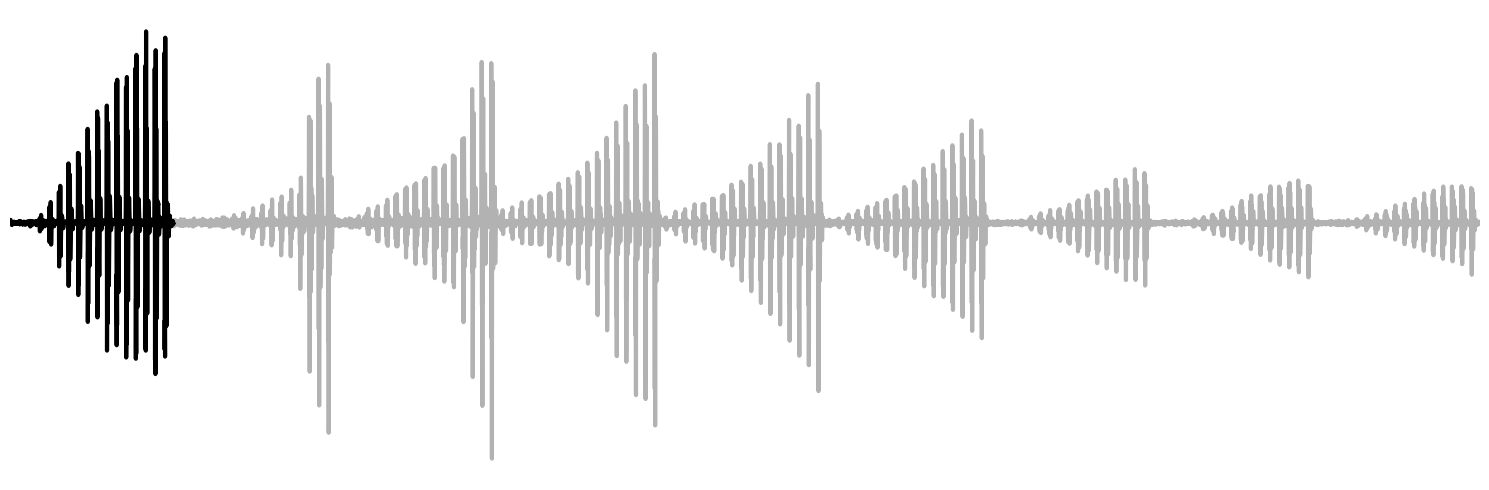

In [5]:
fig = figure(figsize(15,5))
ax = subplot(111)
ax.plot(X.mean(0)[:1953*17:20],'k',linewidth=3)
xlim(0,1953*17*9/20)
ax.plot(np.arange(1953*17/20,1953*17*9/20),X.mean(0)[1953*17::20],'k',alpha=0.3,linewidth=3)

ax.set_axis_off()
tight_layout()
savefig('./Panels/sampletrace_click.pdf',dpi=1200,transparent=True)

Collect results

In [6]:
master = at.collectResults(resultFolder)

master['accuracy'] = master['accuracy']*100
master['test_precision_scorer_avg'] = master['test_precision_scorer_avg']*100
master['test_recall_scorer_avg'] = master['test_recall_scorer_avg']*100
master['roc_auc_score'] = master['roc_auc_score']*100
master['test_precision_scorer_6N'] = master['test_precision_scorer_6N']*100
master['test_recall_scorer_6N'] = master['test_recall_scorer_6N']*100
master['test_f1_scorer_6N'] = master['test_f1_scorer_6N']*100

master['test_precision_scorer_Rep'] = master['test_precision_scorer_Rep']*100
master['test_recall_scorer_Rep'] = master['test_recall_scorer_Rep']*100
master['test_f1_scorer_Rep'] = master['test_f1_scorer_Rep']*100



array(['HiveCote Anova FS', 'MLP Anova FS', 'Random Forest Anova FS',
       'Rocket Anova FS', 'SVC Anova FS', 'XGBOOST Anova FS'],
      dtype=object)
master.loc[master['Model']=='HiveCote Anova FS','Model'] = 'HC'
master.loc[master['Model']=='MLP Anova FS','Model'] = 'MLP'
master.loc[master['Model']=='SVC Anova FS','Model'] = 'SVM'
master.loc[master['Model']=='Random Forest Anova FS','Model'] = 'RF'
master.loc[master['Model']=='Rocket Anova FS','Model'] = 'Rckt'
master.loc[master['Model']=='XGBOOST Anova FS','Model'] = 'XGB'

Check that we have 6 models

In [7]:
master['Model'].unique()

array(['RF', 'SVM', 'XGB', 'Rckt', 'HC', 'MLP'], dtype=object)

In [8]:
df = master.query("Frequency=='Click'")
df.drop(['p_value','Frequency'],axis=1,inplace=True)
df.groupby('Model').agg([mean,std]).to_csv('Click_cv_averagescores.csv')

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_98860/447535307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['p_value','Frequency'],axis=1,inplace=True)
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_98860/447535307.py:3: FutureWarning: The provided callable <function mean at 0x1063596c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Model').agg([mean,std]).to_csv('Click_cv_averagescores.csv')
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_98860/447535307.py:3: FutureWarning: The provided callable <function std at 0x1063597e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callabl

In [9]:
df.groupby('Model').agg([mean,std])

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_98860/3166644133.py:1: FutureWarning: The provided callable <function mean at 0x1063596c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Model').agg([mean,std])
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_98860/3166644133.py:1: FutureWarning: The provided callable <function std at 0x1063597e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby('Model').agg([mean,std])
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_98860/3166644133.py:1: FutureWarning: The provided callable <function mean at 0x1063596c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current be

accuracy            test_f1_scorer_avg           test_f1_scorer_6N  \
            mean        std               mean       std              mean   
Model                                                                        
HC     84.964286   8.879988           0.848476  0.091240         83.818193   
MLP    83.071429  11.443252           0.828070  0.120716         81.803669   
RF     78.964286  11.929176           0.786820  0.123115         77.638802   
Rckt   83.670635   9.906860           0.834761  0.104005         82.546823   
SVM    80.261905  12.797955           0.794772  0.143164         79.823429   
XGB    79.134921  12.416416           0.786334  0.130047         78.412701   

                 test_f1_scorer_Rep            roc_auc_score             ...  \
             std               mean        std          mean        std  ...   
Model                                                                    ...   
HC     10.324865          85.716414   8.601919     90.772817   7.246657  ...   
MLP    12.988711          83.663405  12.184649     90.249008   8.907740  ...   
RF     12.426593          79.556038  13.105150     90.921131   7.672142  ...   
Rckt   11.216365          84.228744  10.637494     83.670635   9.906860  ...   
SVM    12.962310          79.146955  16.969317     90.965278   8.753091  ...   
XGB    12.431528          78.780095  14.470543     88.490079  10.339694  ...   

      test_precision_scorer_6N            test_precision_scorer_Rep  \
                          mean        std                      mean   
Model                                                                 
HC                   85.702597  12.458172                 86.563492   
MLP                  84.164358  15.239256                 85.184993   
RF                   80.099423  15.956070                 81.345887   
Rckt                 84.796825  14.074027                 85.761472   
SVM                  78.473016  15.414122                 85.493218   
XGB                  78.500577  15.151890                 83.145599   

                 test_recall_scorer_avg            test_recall_scorer_6N  \
             std                   mean        std                  mean   
Model                                                                      
HC      9.317436              85.033333   8.902377             83.428571   
MLP    11.082776              83.166667  11.603874             81.642857   
RF     13.975422              79.033333  12.030969             77.928571   
Rckt    9.675649              83.783333  10.010787             82.285714   
SVM    13.099049              80.083333  13.172862             83.357143   
XGB    14.722998              79.050000  12.602887             80.714286   

                 test_recall_scorer_Rep             
             std                   mean        std  
Model                                               
HC     13.046310              86.500000  13.118201  
MLP    15.867757              84.500000  16.742113  
RF     16.462504              80.000000  17.709468  
Rckt   14.050519              85.055556  16.013835  
SVM    15.582169              77.166667  20.349632  
XGB    16.170331              77.555556  19.281226  

[6 rows x 22 columns]

Statistics on scores to test whether significant differences exist in the performances of the models.

In [10]:
# Statistics using friedman test followed by Nemenyi posthoc 

from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
metric = 'test_recall_scorer_6N'#'roc_auc_score' #

# Example data: model performances across cross-validation folds
# Rows: cross-validation folds
# Columns: models

# For example, model accuracies across 10 cross-validation folds for 6 models
data1 = df[[metric,'Model']].pivot(columns='Model',values=metric)
data = data1.values


# Perform Friedman test
stat, p_value = friedmanchisquare(*data.T)  # Use .T to transpose for the correct shape
print(f'Friedman test statistic: {stat}, p-value: {p_value}')

if p_value < 0.05:
    print("Significant differences found, performing Nemenyi post-hoc test...")

    # Perform Nemenyi post-hoc test
    nemenyi_result = sp.posthoc_nemenyi_friedman(data1)

    # Display the pairwise p-values from the Nemenyi test
    print("Nemenyi post-hoc p-values:")
    print(nemenyi_result)

    # Optional: Plot a heatmap of the pairwise p-values
    labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']
    plt.figure(figsize=(10, 7))
    sp.sign_plot(nemenyi_result, labels=True)
    plt.title("Critical Difference Diagram (Nemenyi Test)")
    plt.show()
else:
    print("No significant differences found among models.")

Friedman test statistic: 9.21568627450972, p-value: 0.10076429274322315
No significant differences found among models.


In [11]:
df = master.query("Frequency=='Click'")
df.drop(['p_value','Frequency'],axis=1,inplace=True)
df.groupby('Model').agg([mean,std]).to_csv('Global_cv_averagescores.csv')
df.groupby('Model').mean()

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_98860/3335828317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['p_value','Frequency'],axis=1,inplace=True)
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_98860/3335828317.py:3: FutureWarning: The provided callable <function mean at 0x1063596c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Model').agg([mean,std]).to_csv('Global_cv_averagescores.csv')
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_98860/3335828317.py:3: FutureWarning: The provided callable <function std at 0x1063597e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided cal

,accuracy,test_f1_scorer_avg,test_f1_scorer_6N,test_f1_scorer_Rep,roc_auc_score,test_precision_scorer_avg,test_precision_scorer_6N,test_precision_scorer_Rep,test_recall_scorer_avg,test_recall_scorer_6N,test_recall_scorer_Rep
Model,,,,,,,,,,,
HC,84.964286,0.848476,83.818193,85.716414,90.772817,86.227482,85.702597,86.563492,85.033333,83.428571,86.500000
MLP,83.071429,0.828070,81.803669,83.663405,90.249008,84.733266,84.164358,85.184993,83.166667,81.642857,84.500000
RF,78.964286,0.786820,77.638802,79.556038,90.921131,80.807797,80.099423,81.345887,79.033333,77.928571,80.000000
Rckt,83.670635,0.834761,82.546823,84.228744,83.670635,85.351681,84.796825,85.761472,83.783333,82.285714,85.055556
SVM,80.261905,0.794772,79.823429,79.146955,90.965278,82.219069,78.473016,85.493218,80.083333,83.357143,77.166667
XGB,79.134921,0.786334,78.412701,78.780095,88.490079,81.011934,78.500577,83.145599,79.050000,80.714286,77.555556


#Make all panels

/Users/federico/Desktop/ABR-ML 2/ABR-ML-analysis/notebooks/Paper/figureTools.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model idx'] = le.transform(df['Model'])
/Users/federico/Desktop/ABR-ML 2/ABR-ML-analysis/notebooks/Paper/figureTools.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model idx'] = le.transform(df['Model'])
/Users/federico/Desktop/ABR-ML 2/ABR-ML-analysis/notebooks/Paper/figureTools.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

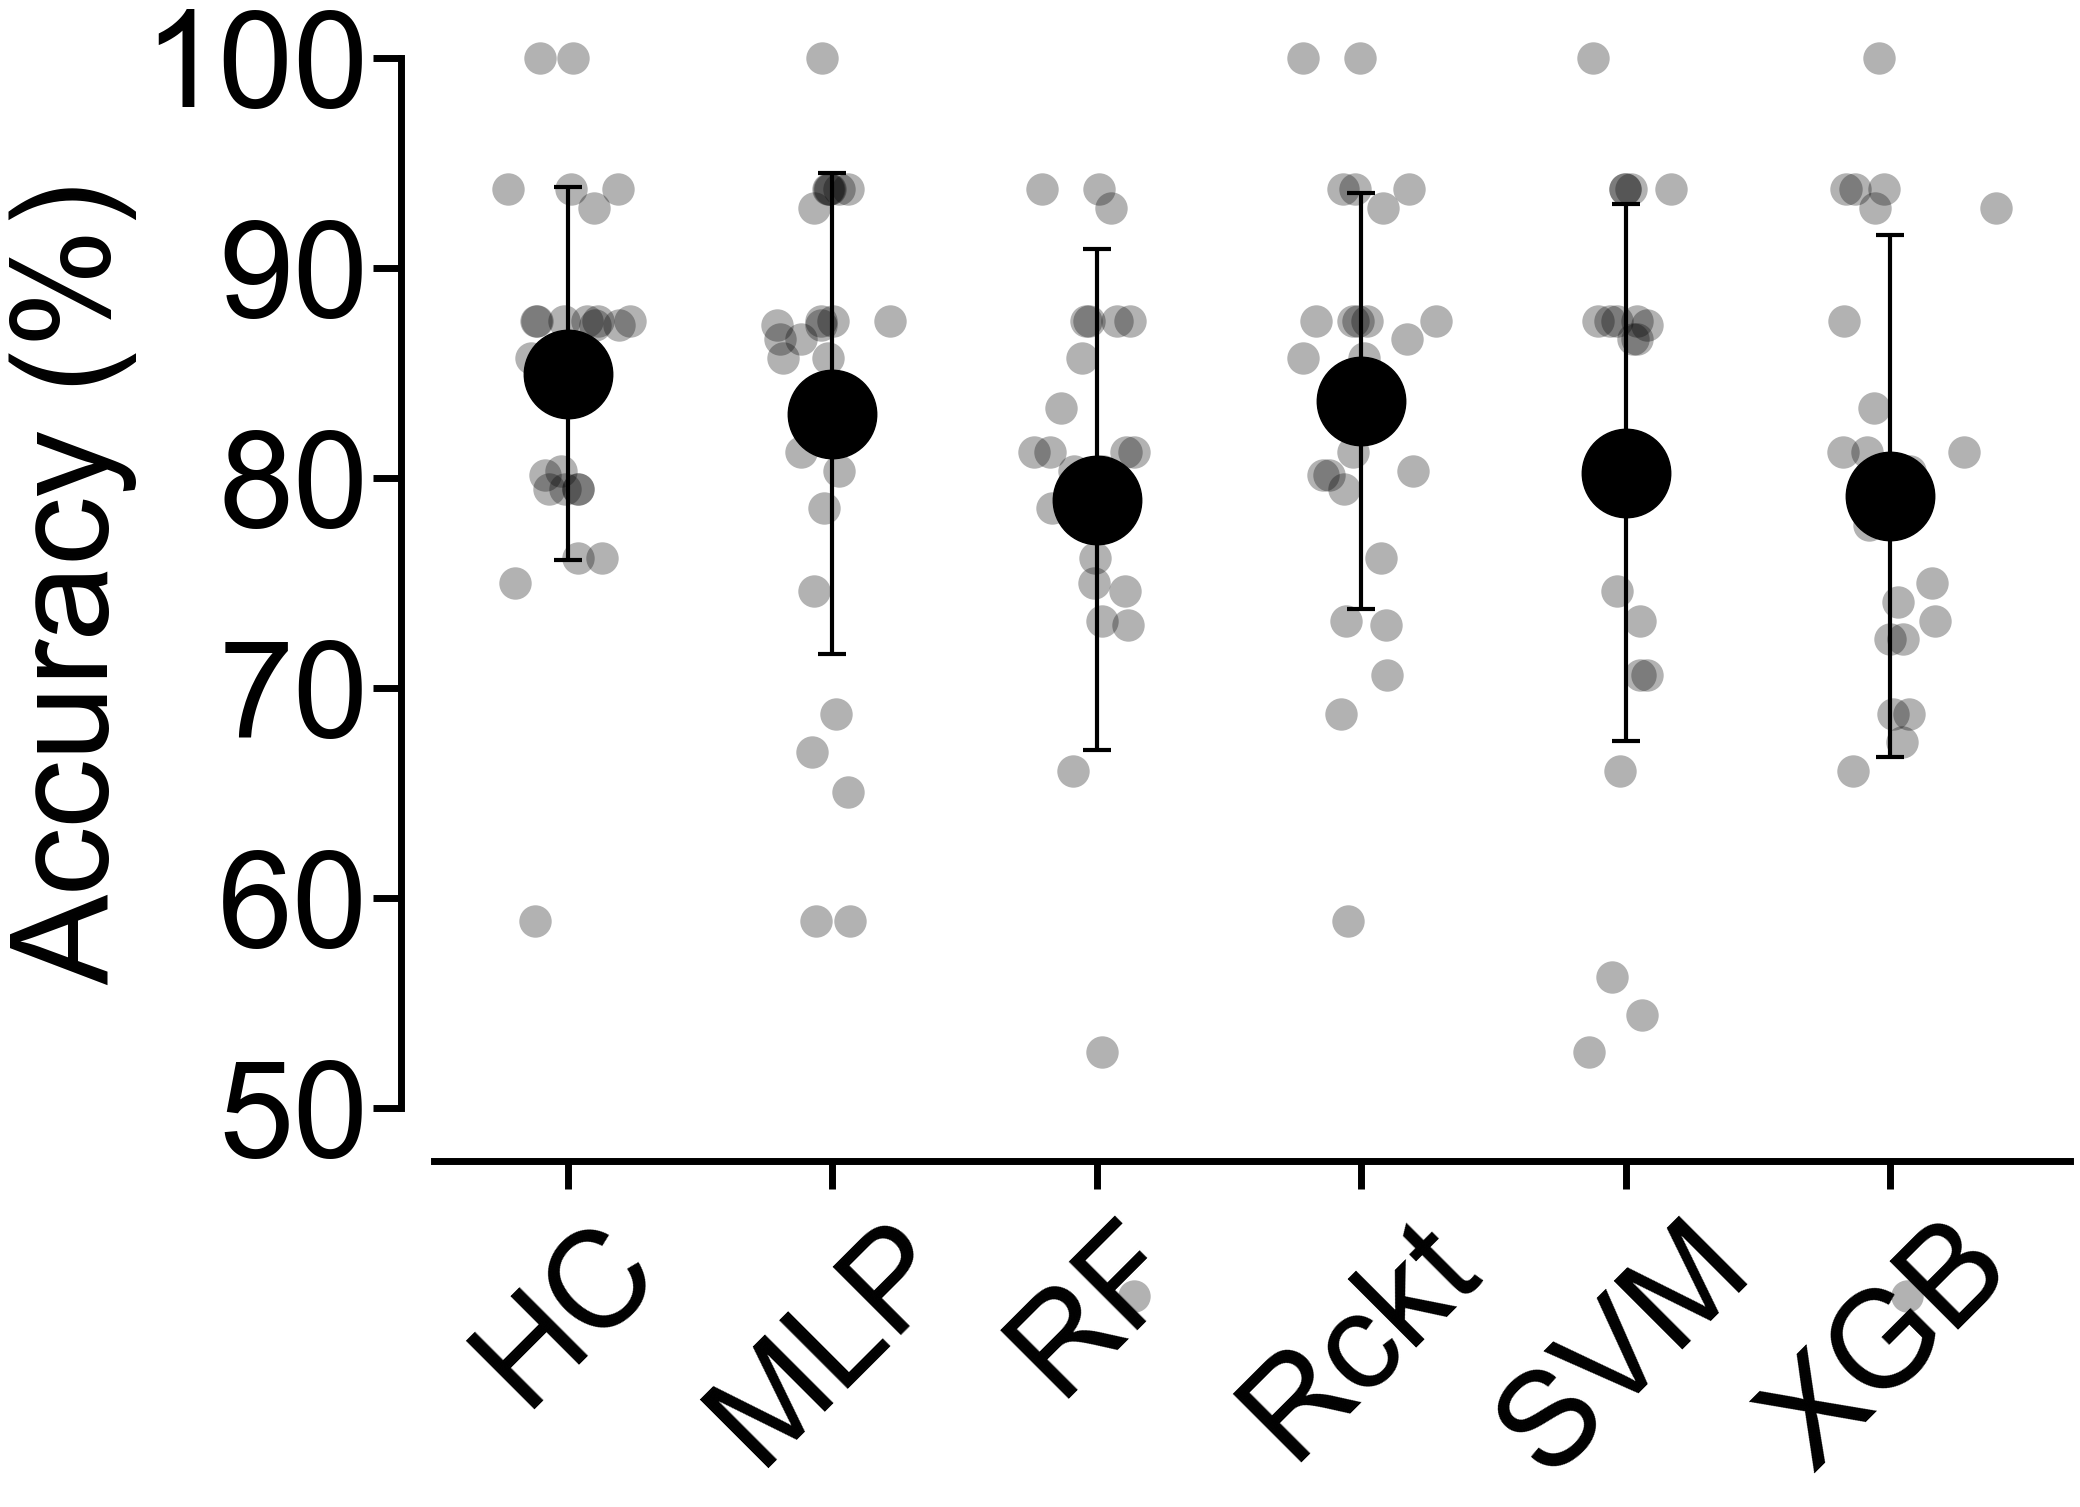

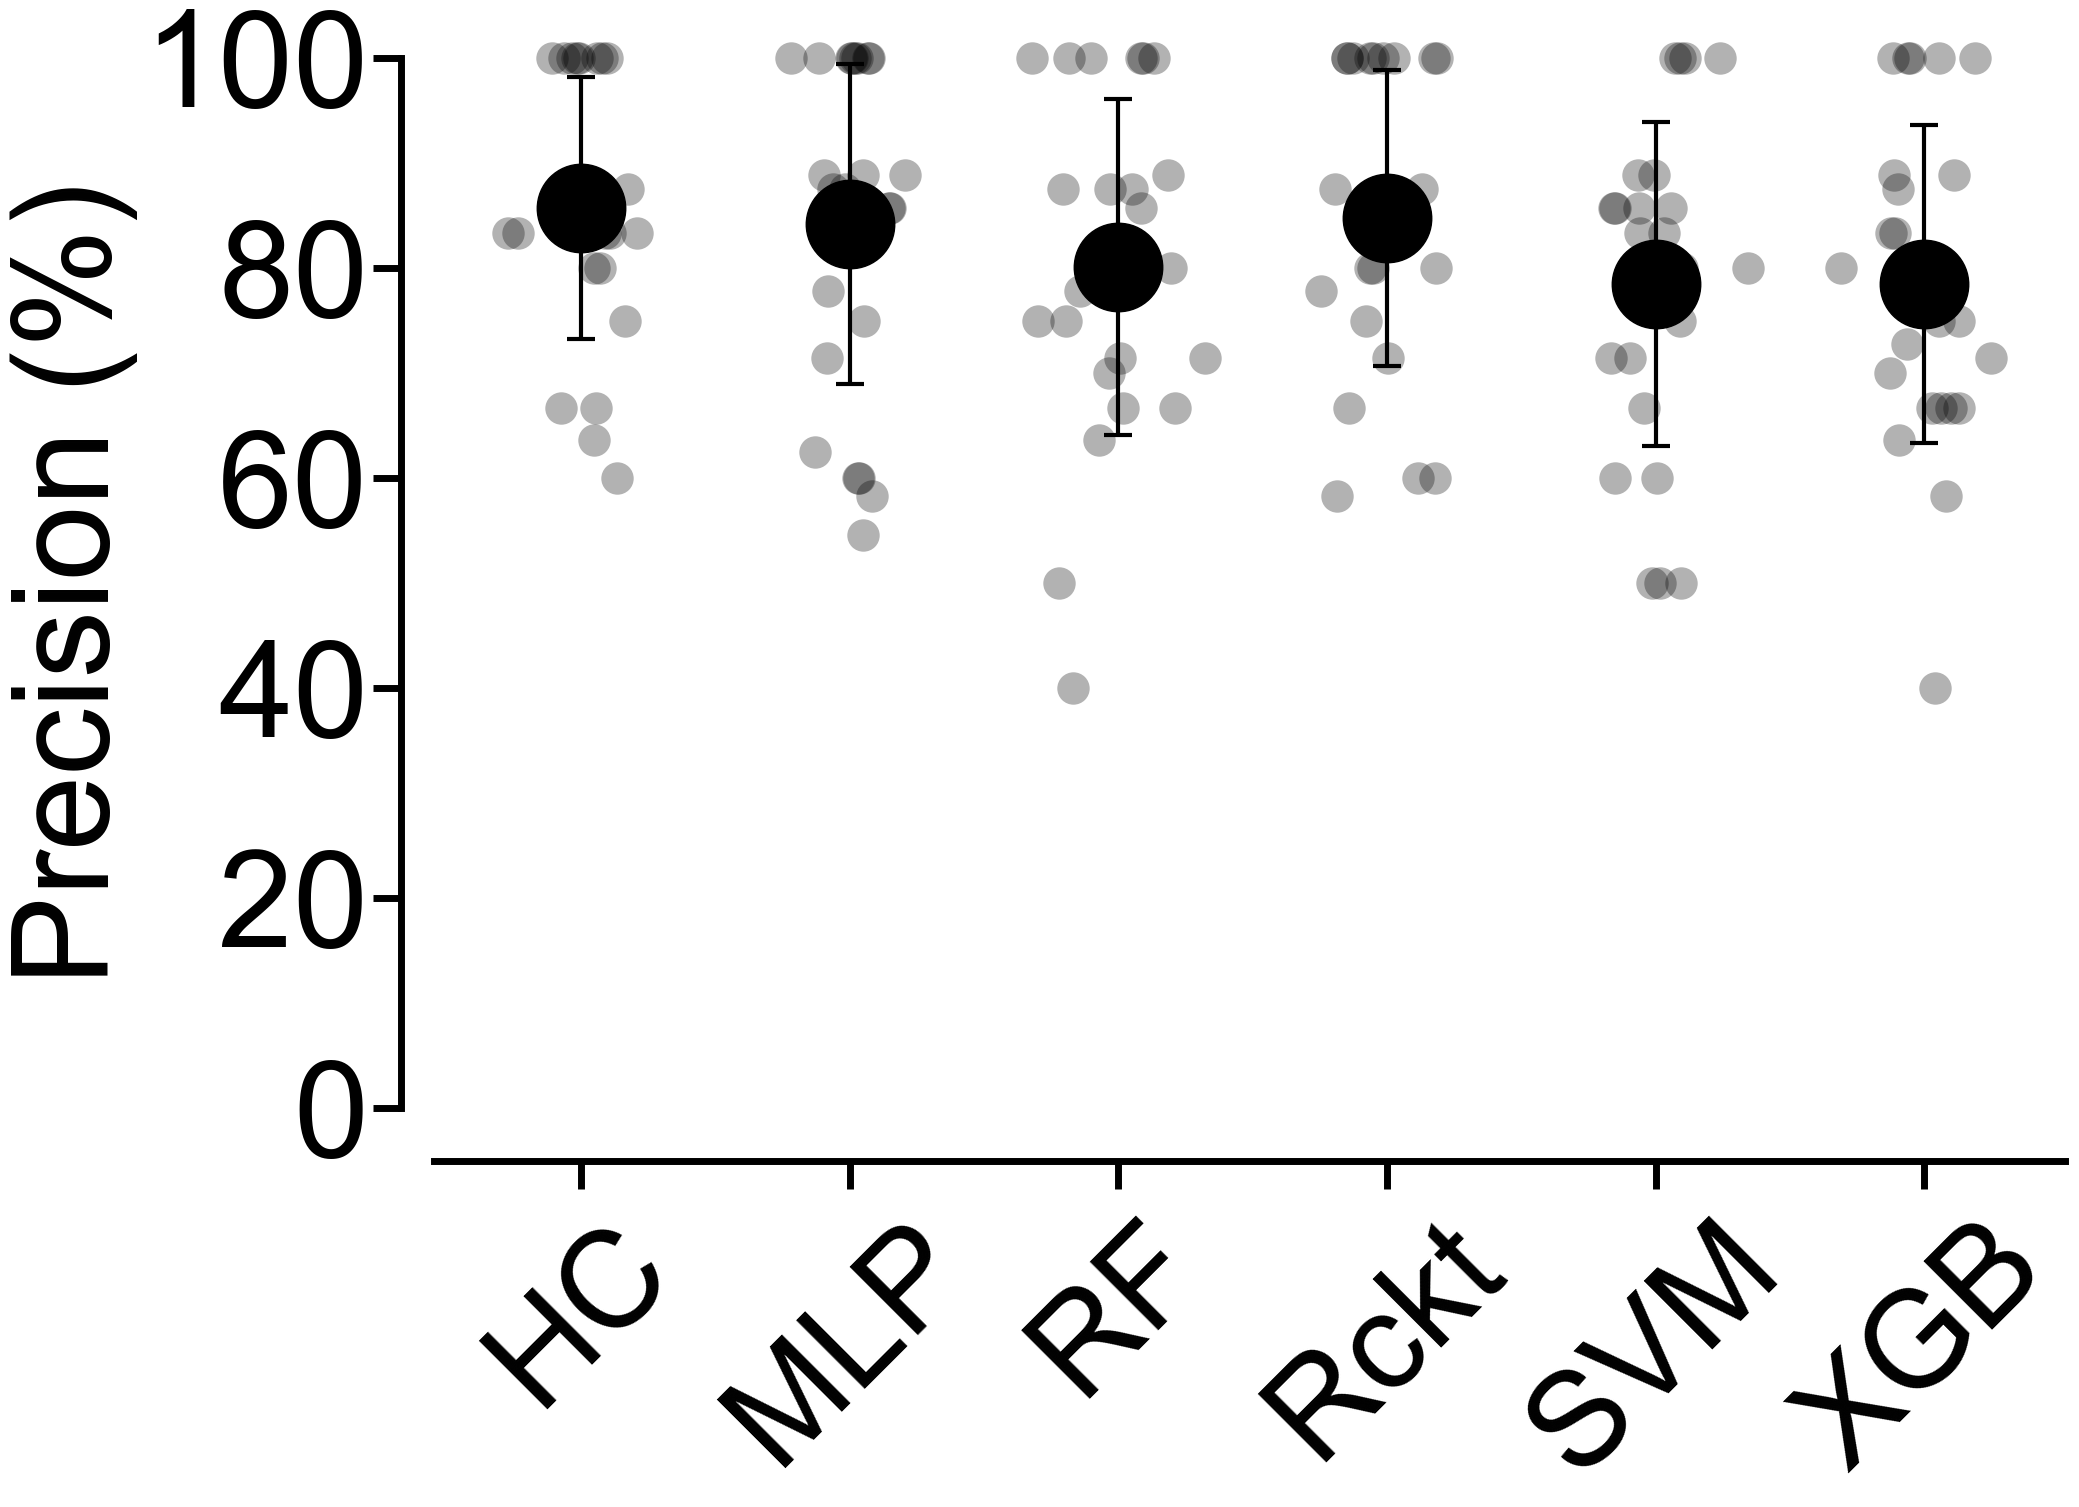

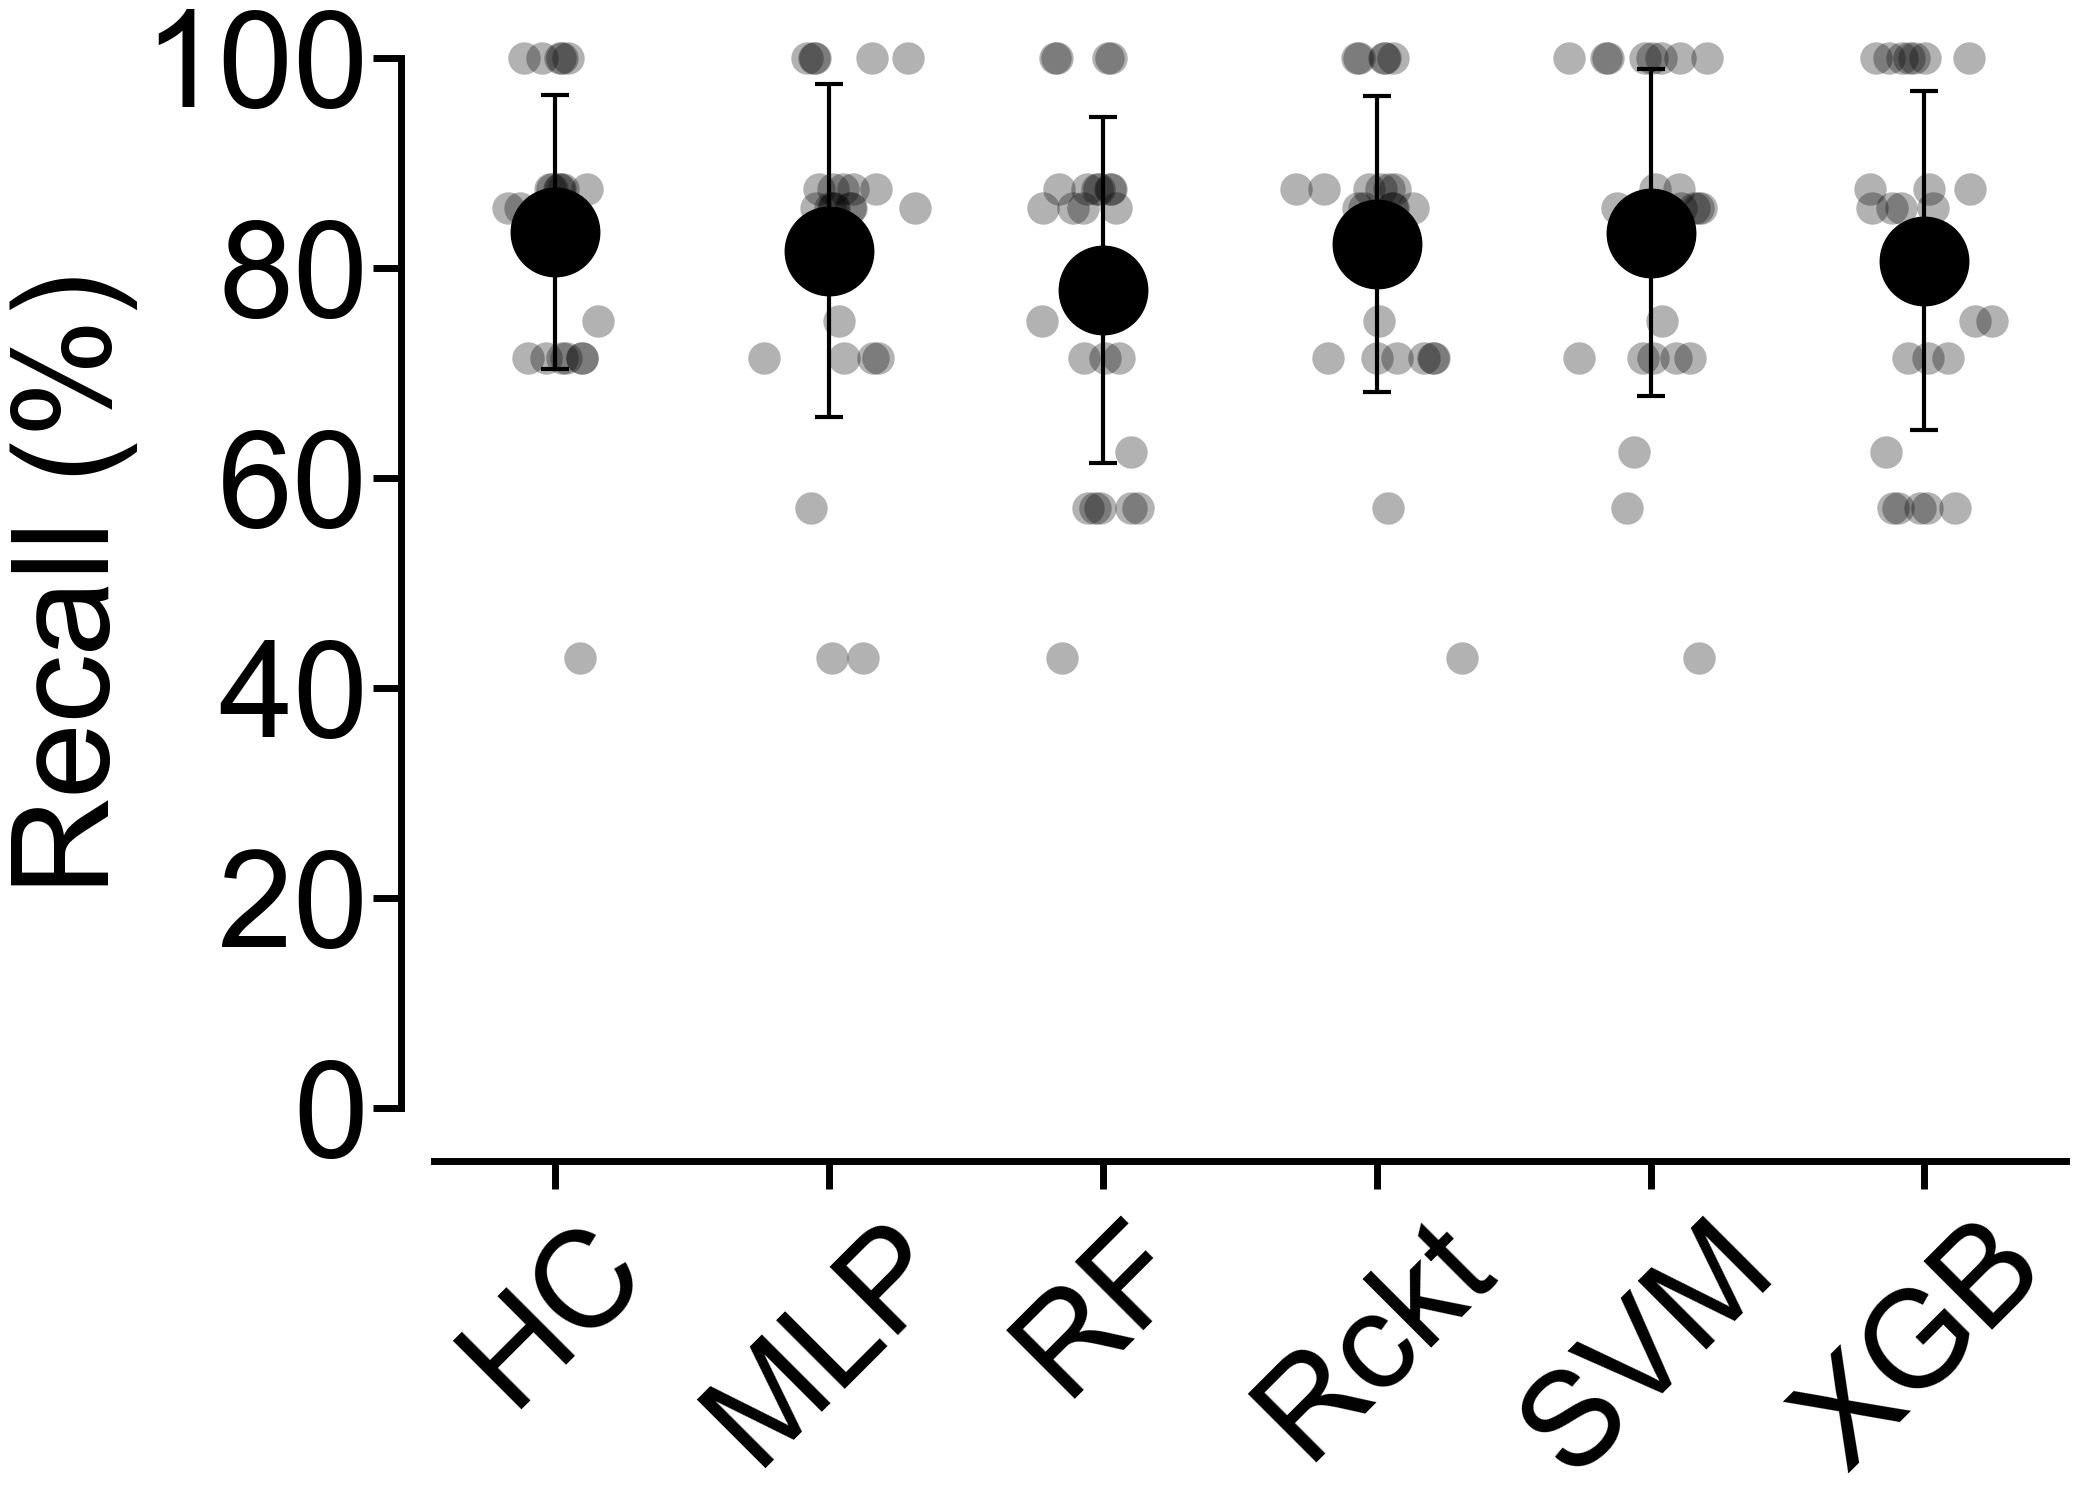

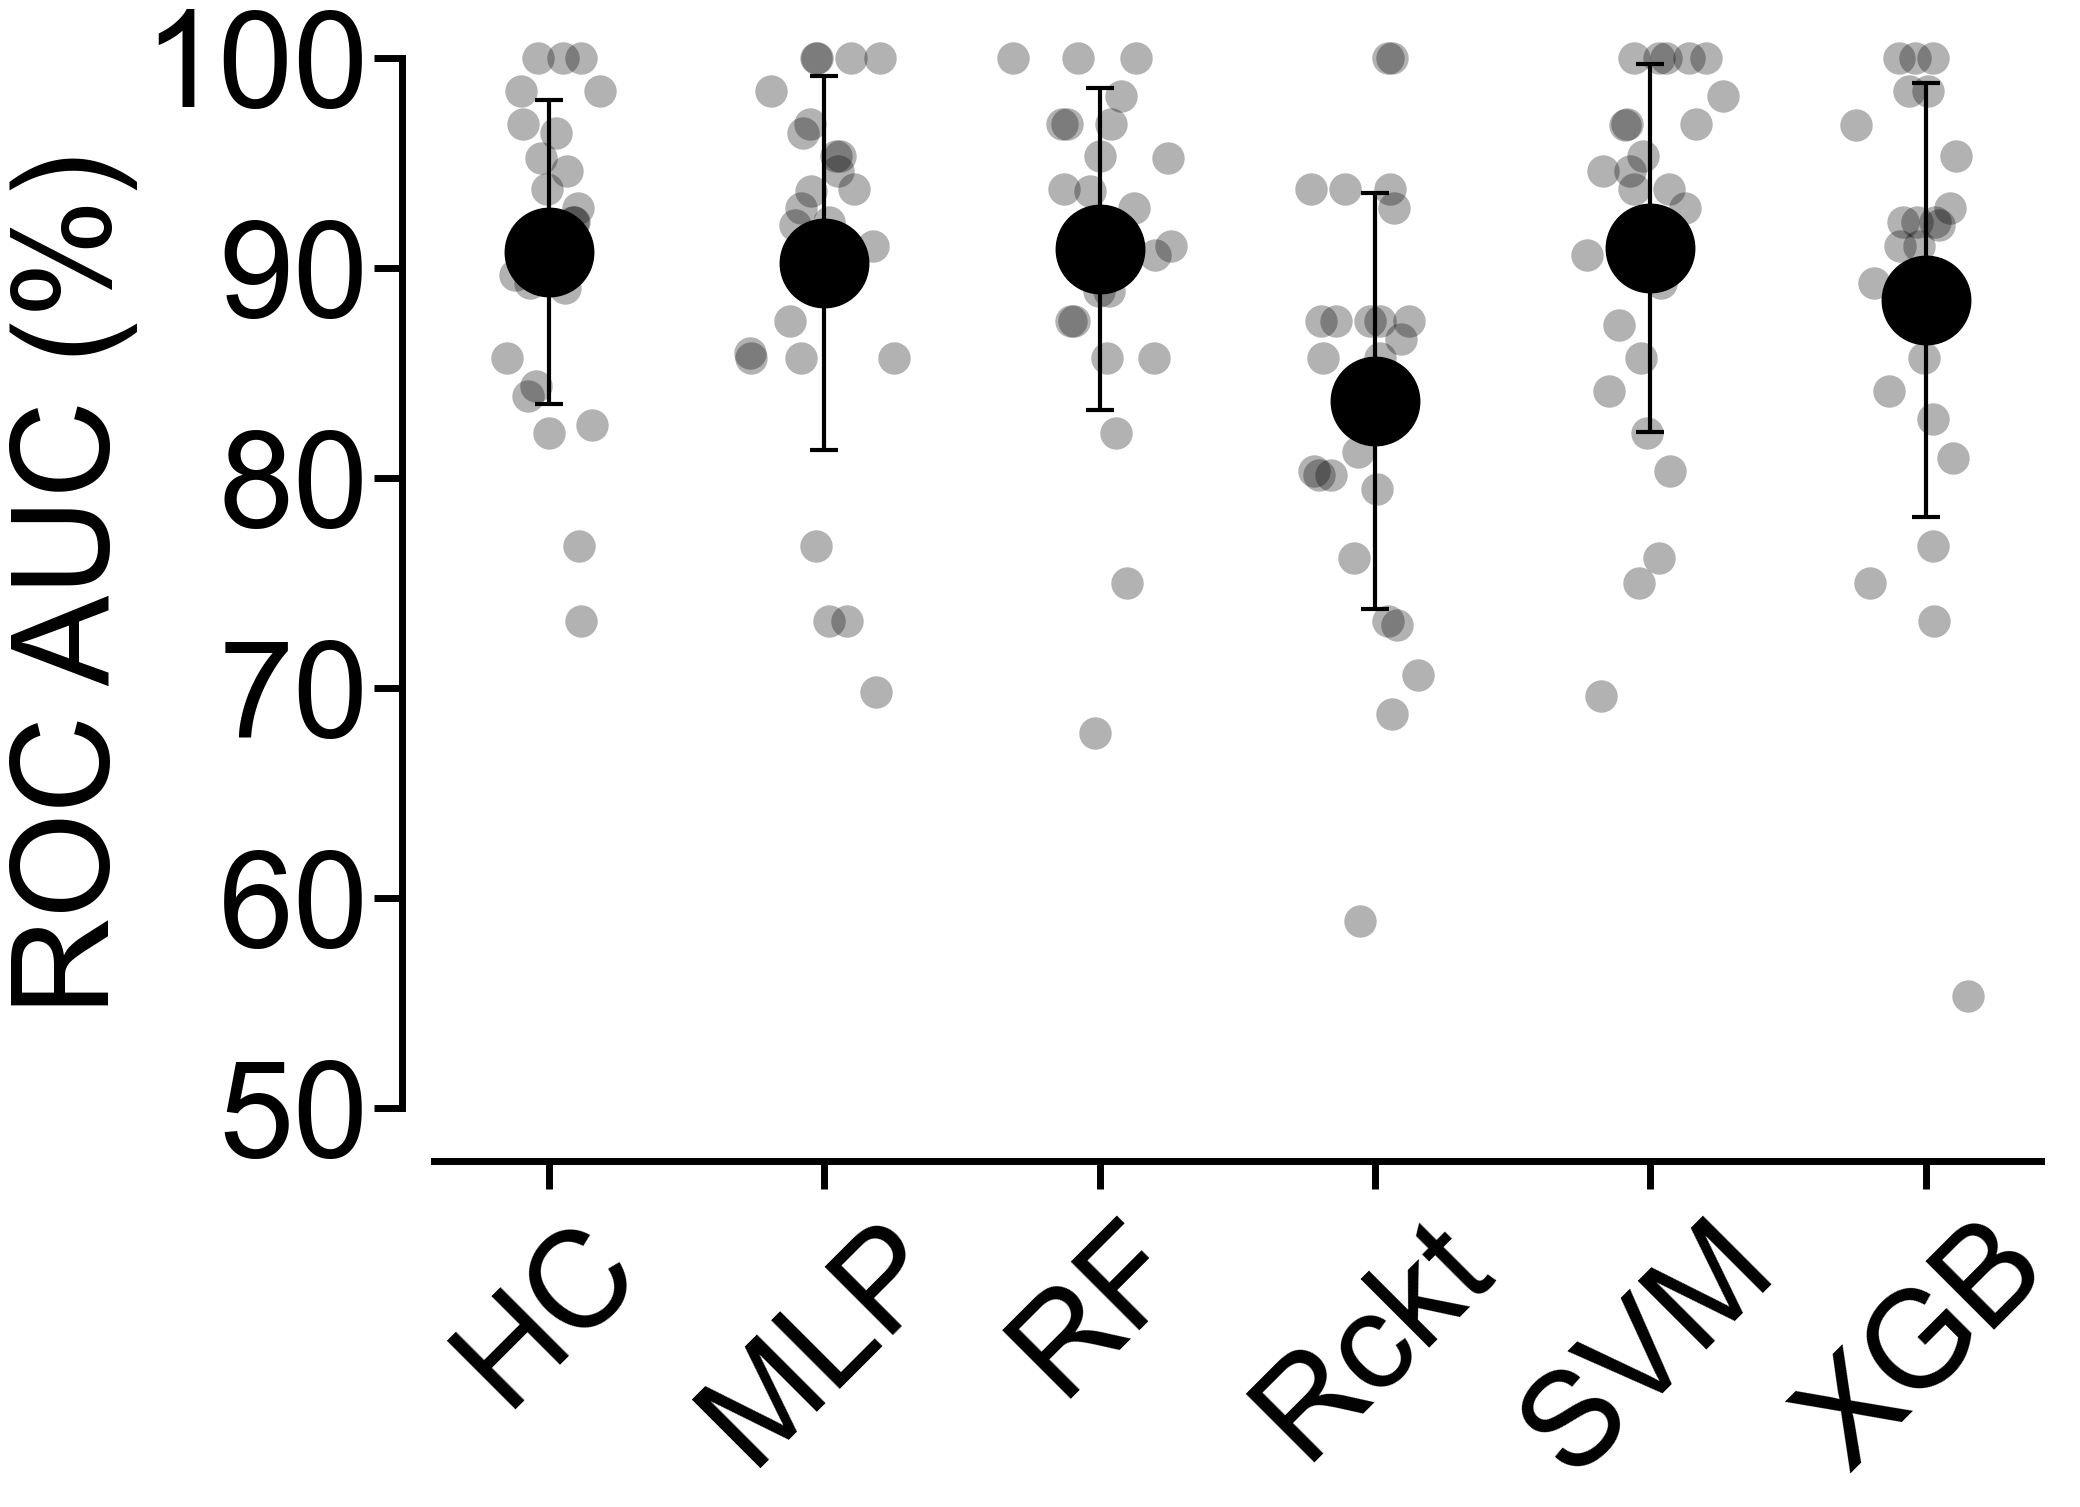

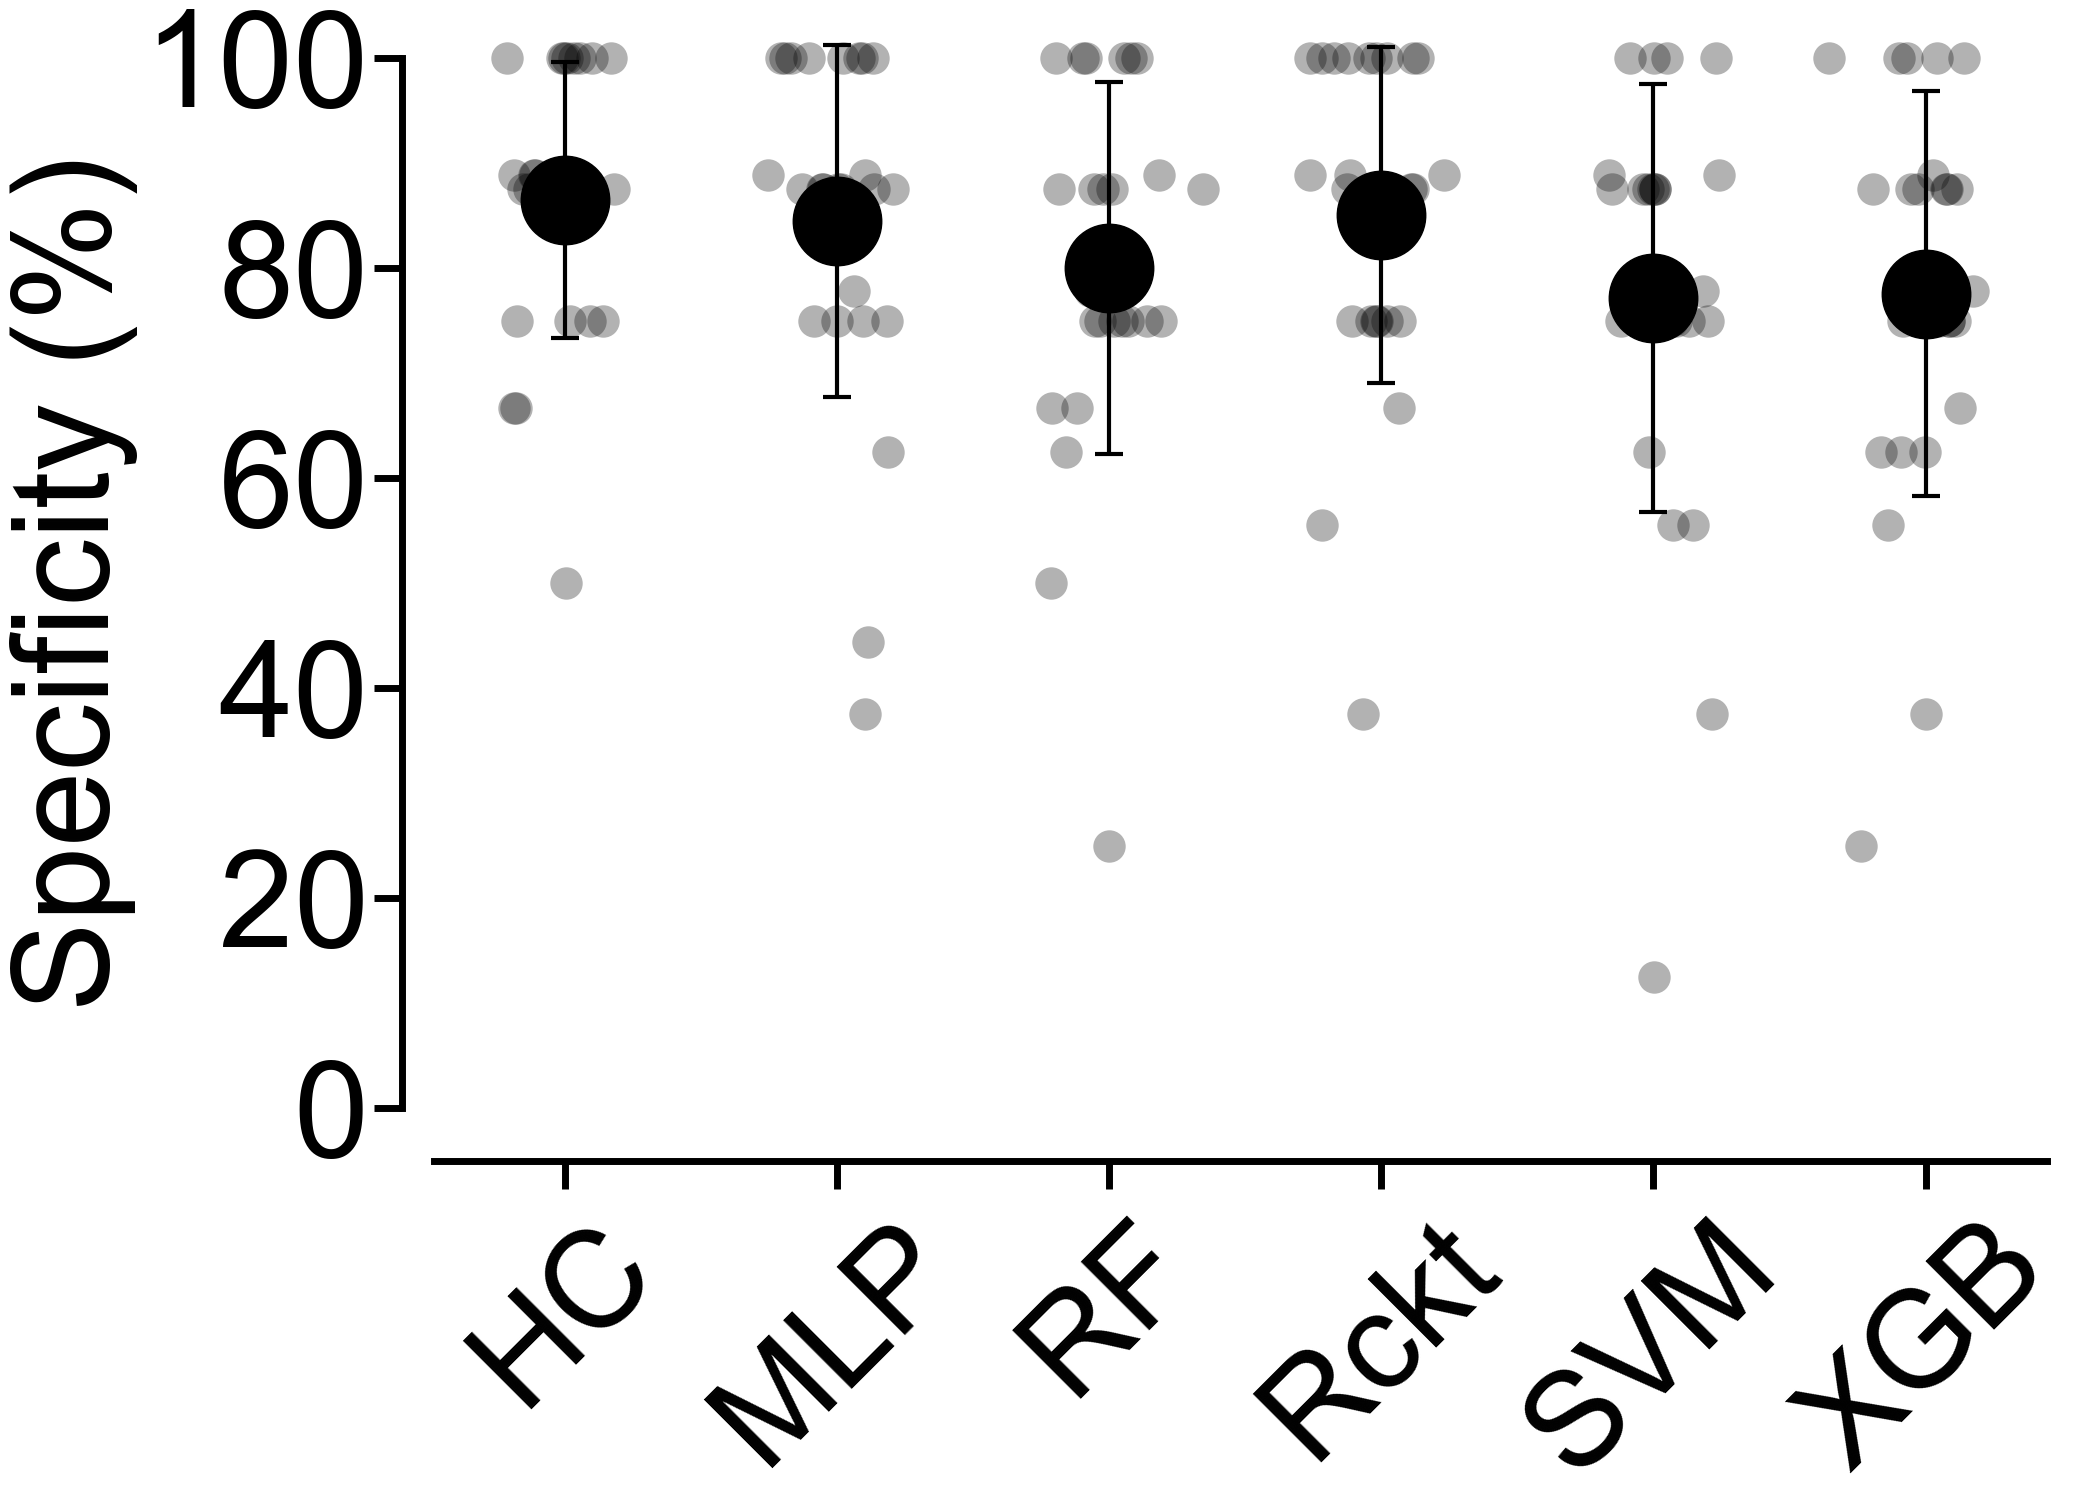

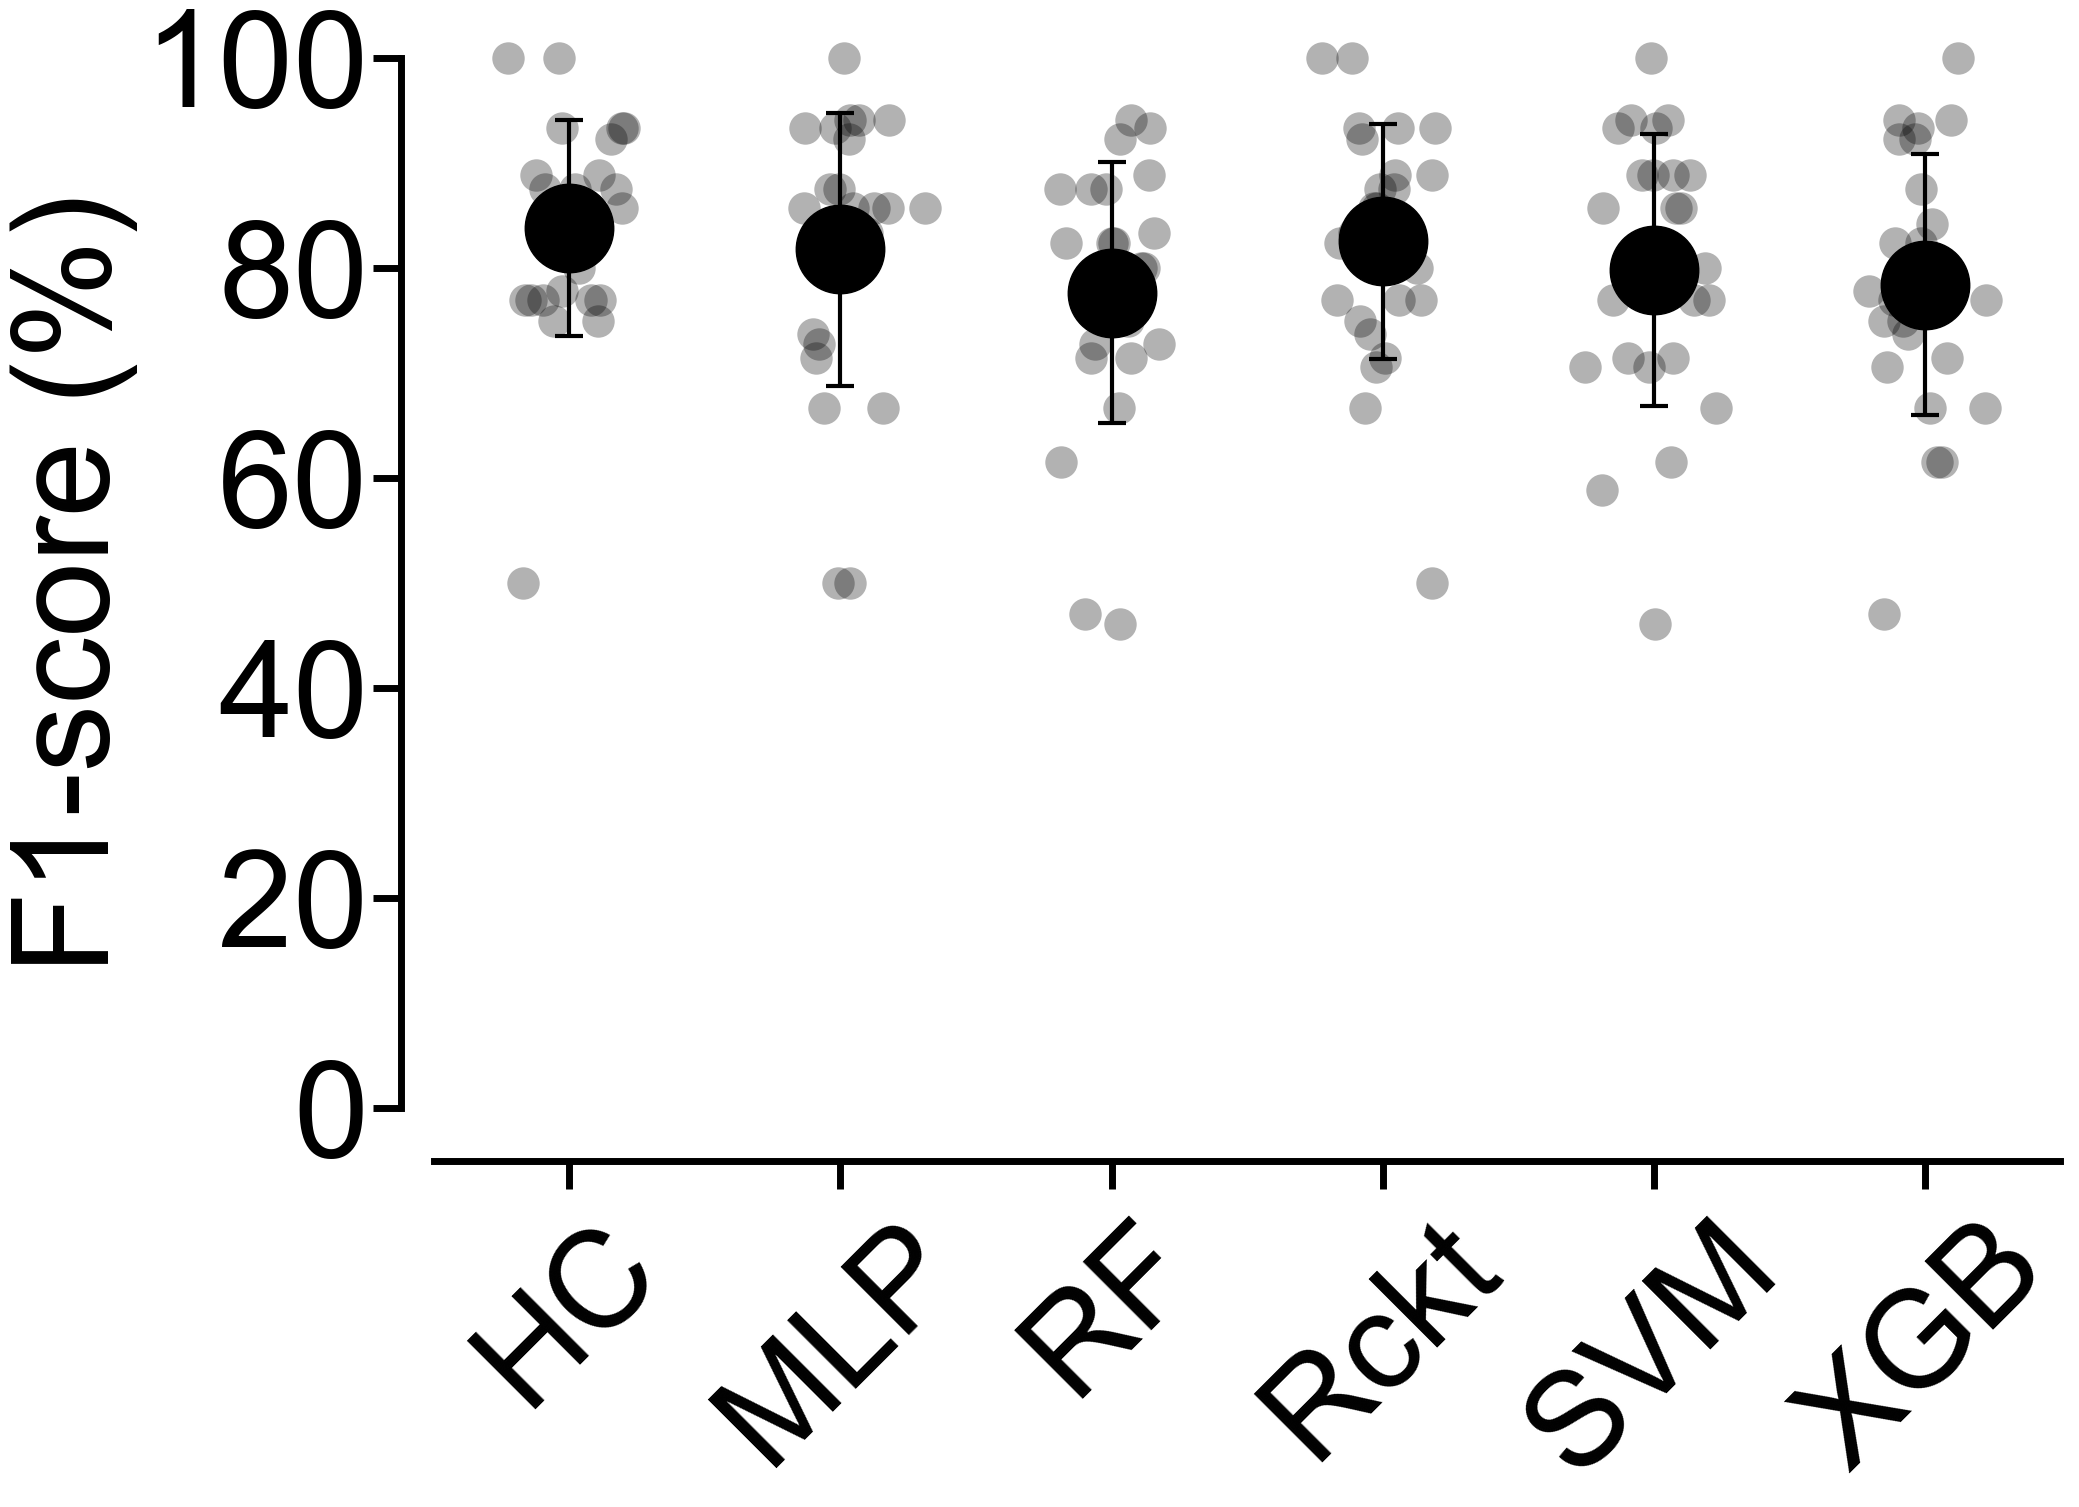

In [12]:
df = master[master['Frequency']=='Click']
ax,le= figureTools.makeMetricFigure(df,ylabel='Accuracy (%)',figureSizeSF=[1.4,1.4],fontSize=fontSize)
ax.set_ylim(50,100)
savefig('./Panels/accuracy_click.pdf',transparent=True,dpi=1200)


df = master[master['Frequency']=='Click']
ax,le = figureTools.makeMetricFigure(df,'test_precision_scorer_6N',le=le,ylabel='Precision (%)',figureSizeSF=[1.4,1.4],fontSize=fontSize)

ax.set_ylim(0,100)
savefig('./Panels/precision_click.pdf',transparent=True,dpi=1200)


df = master[master['Frequency']=='Click']
ax,le = figureTools.makeMetricFigure(df,'test_recall_scorer_6N',le=le,ylabel='Recall (%)',figureSizeSF=[1.4,1.4],fontSize=fontSize)

ax.set_ylim(0,100)
ax.set_ylim(0,100)
savefig('./Panels/recall_click.pdf',transparent=True,dpi=1200)


df = master[master['Frequency']=='Click']
ax,le = figureTools.makeMetricFigure(df,'roc_auc_score',le=le,ylabel = 'ROC AUC (%)',figureSizeSF=[1.4,1.4],fontSize=fontSize)
ax.set_ylim(50,100)
ax.set_ylim(50,100)
savefig('./Panels/rocauc_click.pdf',transparent=True,dpi=1200)


df = master[master['Frequency']=='Click']
ax,le = figureTools.makeMetricFigure(df,'test_recall_scorer_Rep',le=le,ylabel='Specificity (%)',figureSizeSF=[1.4,1.4],fontSize=fontSize)

ax.set_ylim(0,100)
ax.set_ylim(0,100)
savefig('./Panels/specificity_click.pdf',transparent=True,dpi=1200)


df = master[master['Frequency']=='Click']
ax,le = figureTools.makeMetricFigure(df,'test_f1_scorer_6N',le=le,ylabel='F1-score (%)',figureSizeSF=[1.4,1.4],fontSize=fontSize)

ax.set_ylim(0,100)
ax.set_ylim(0,100)
savefig('./Panels/f1_score_click.pdf',transparent=True,dpi=1200)

Confusion matrices

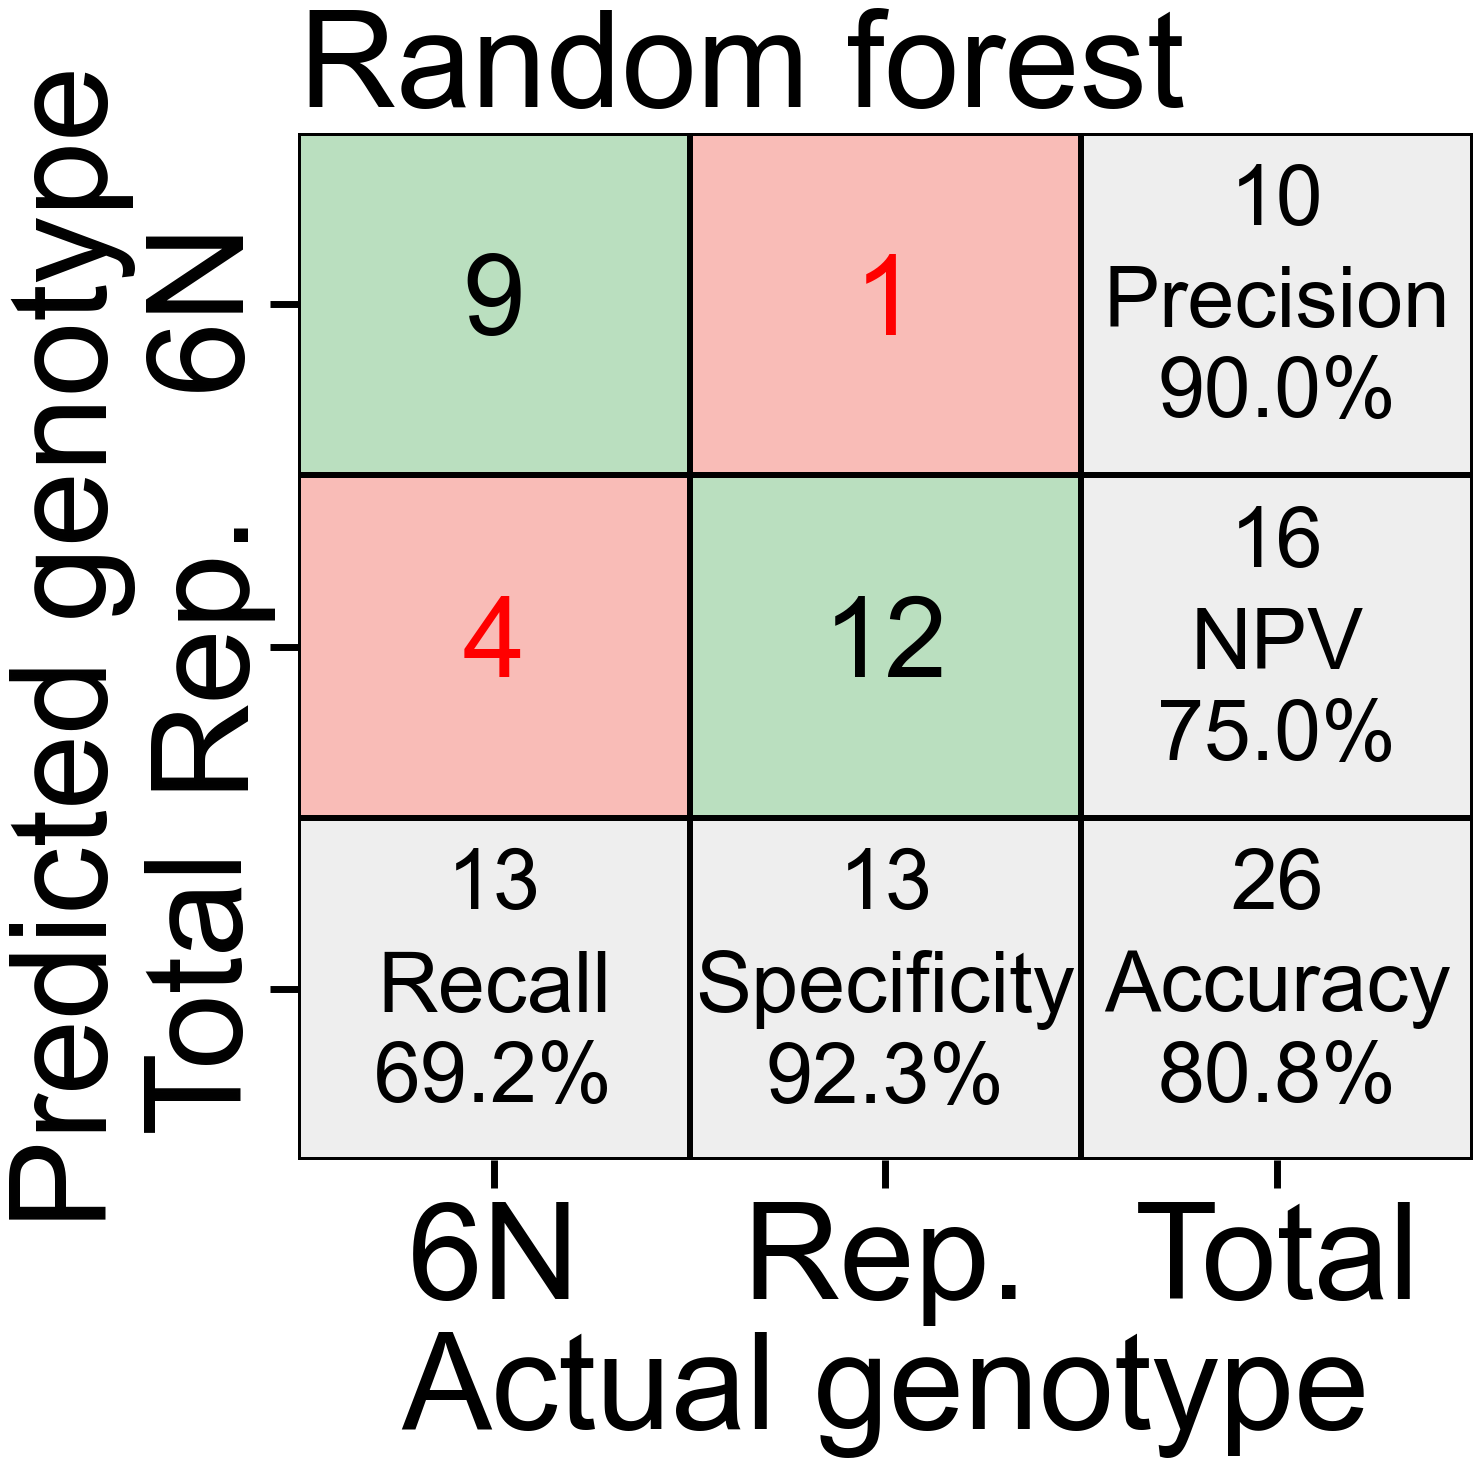

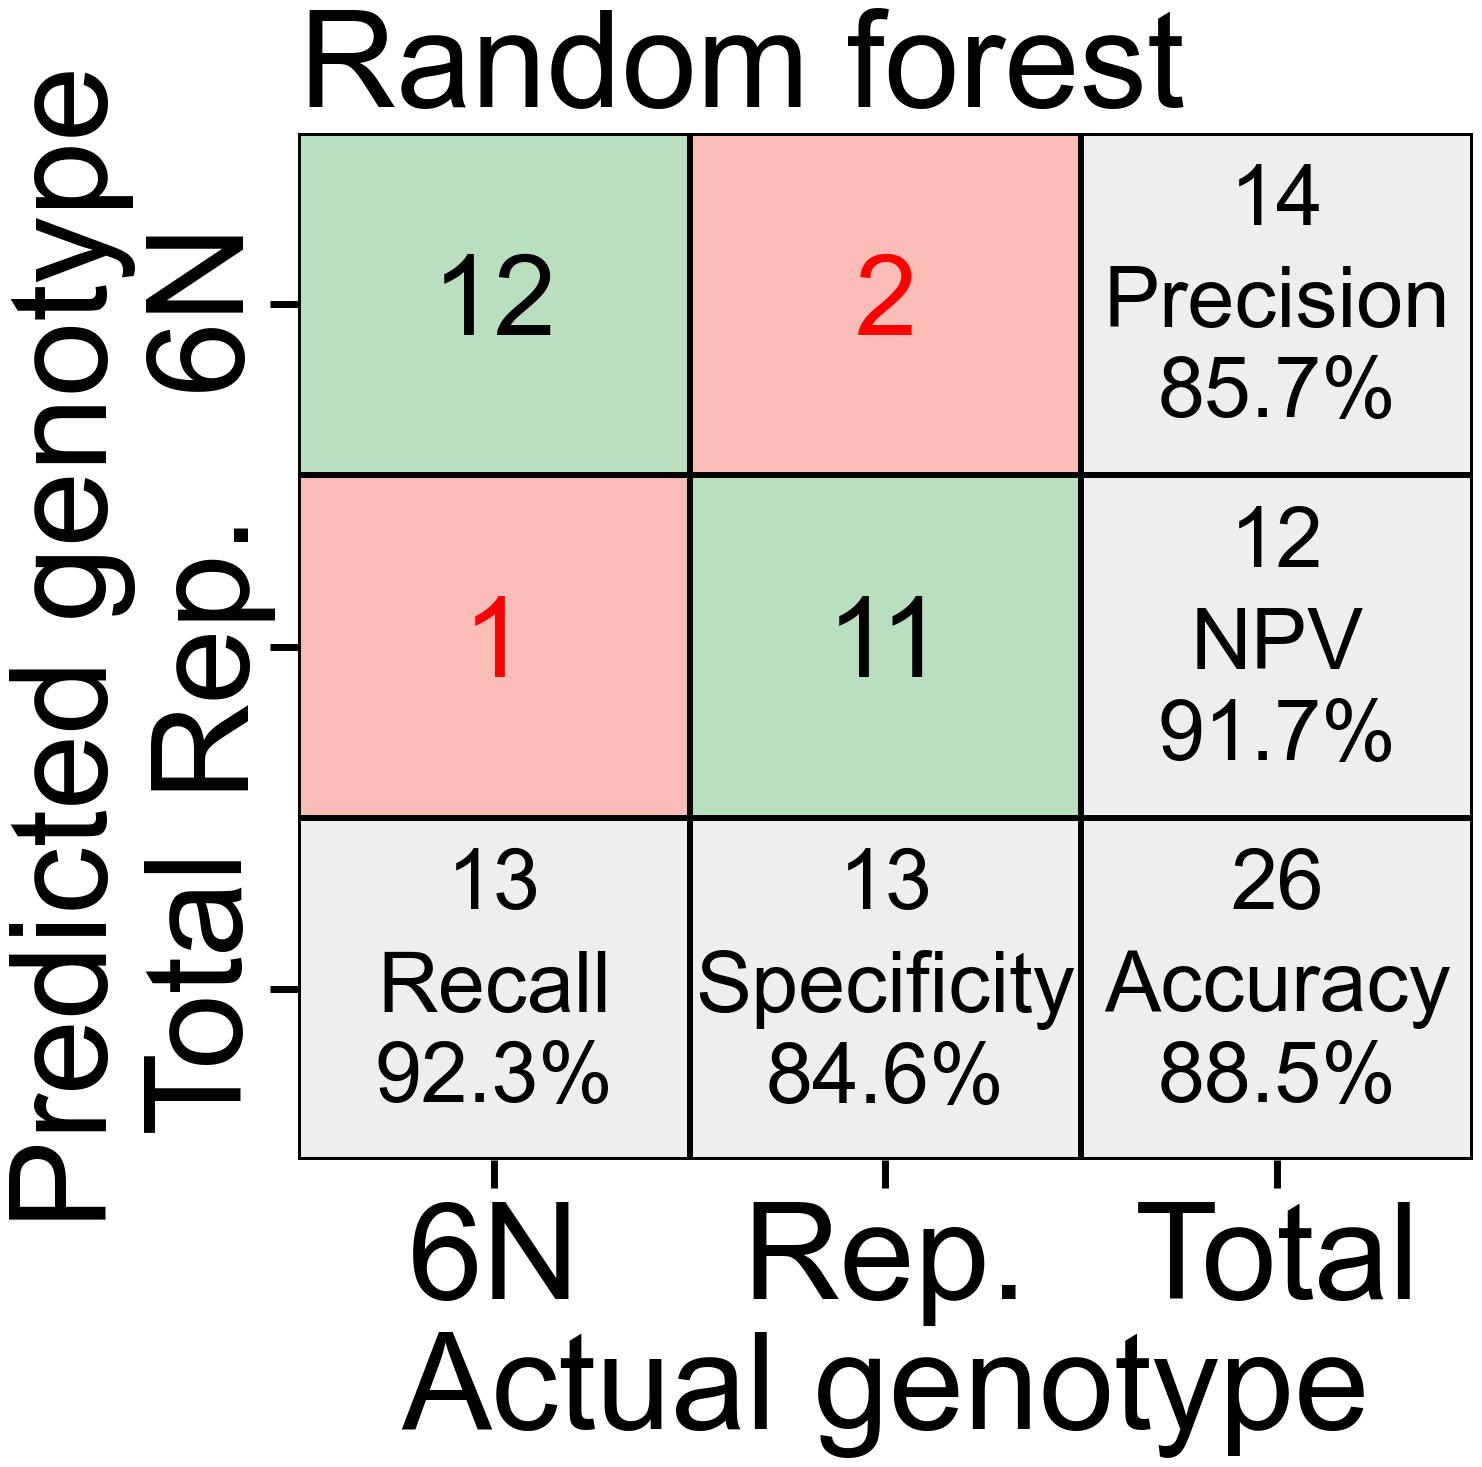

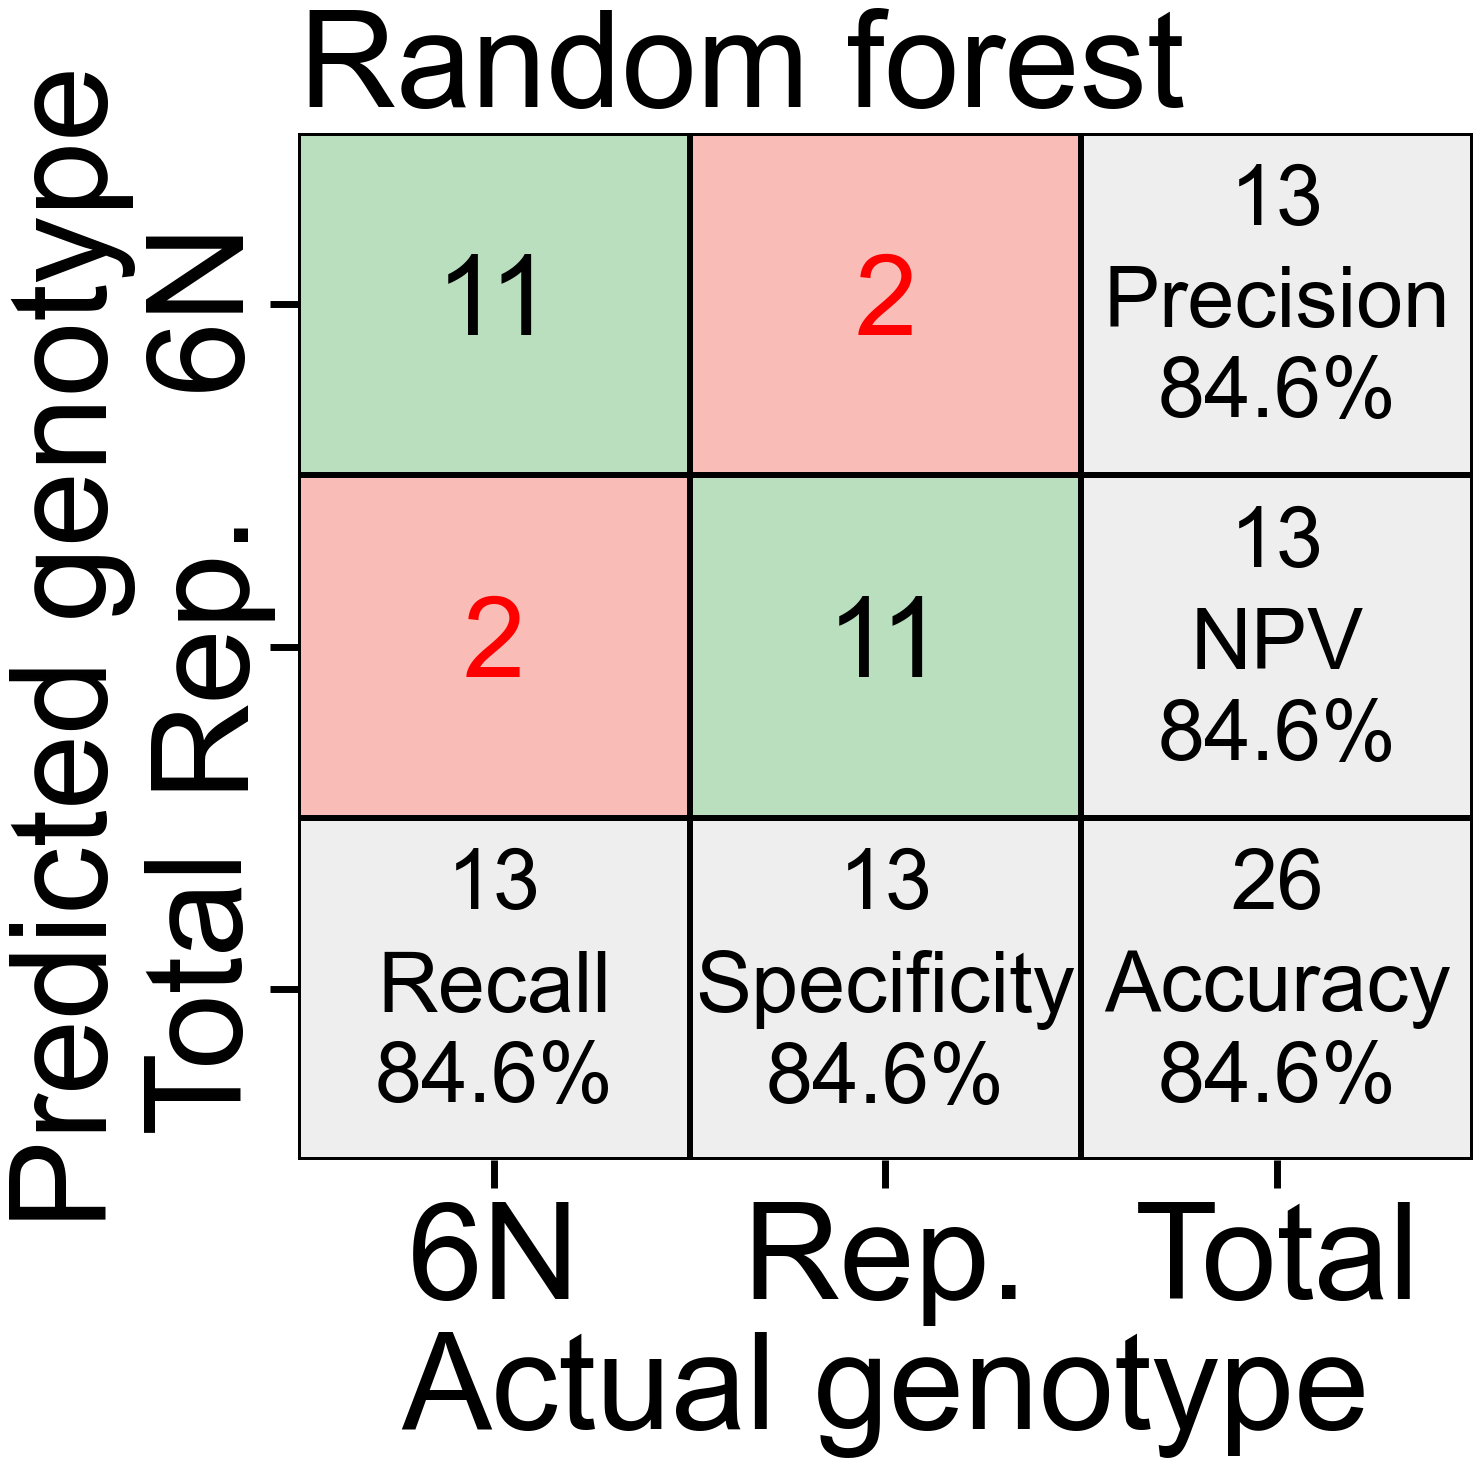

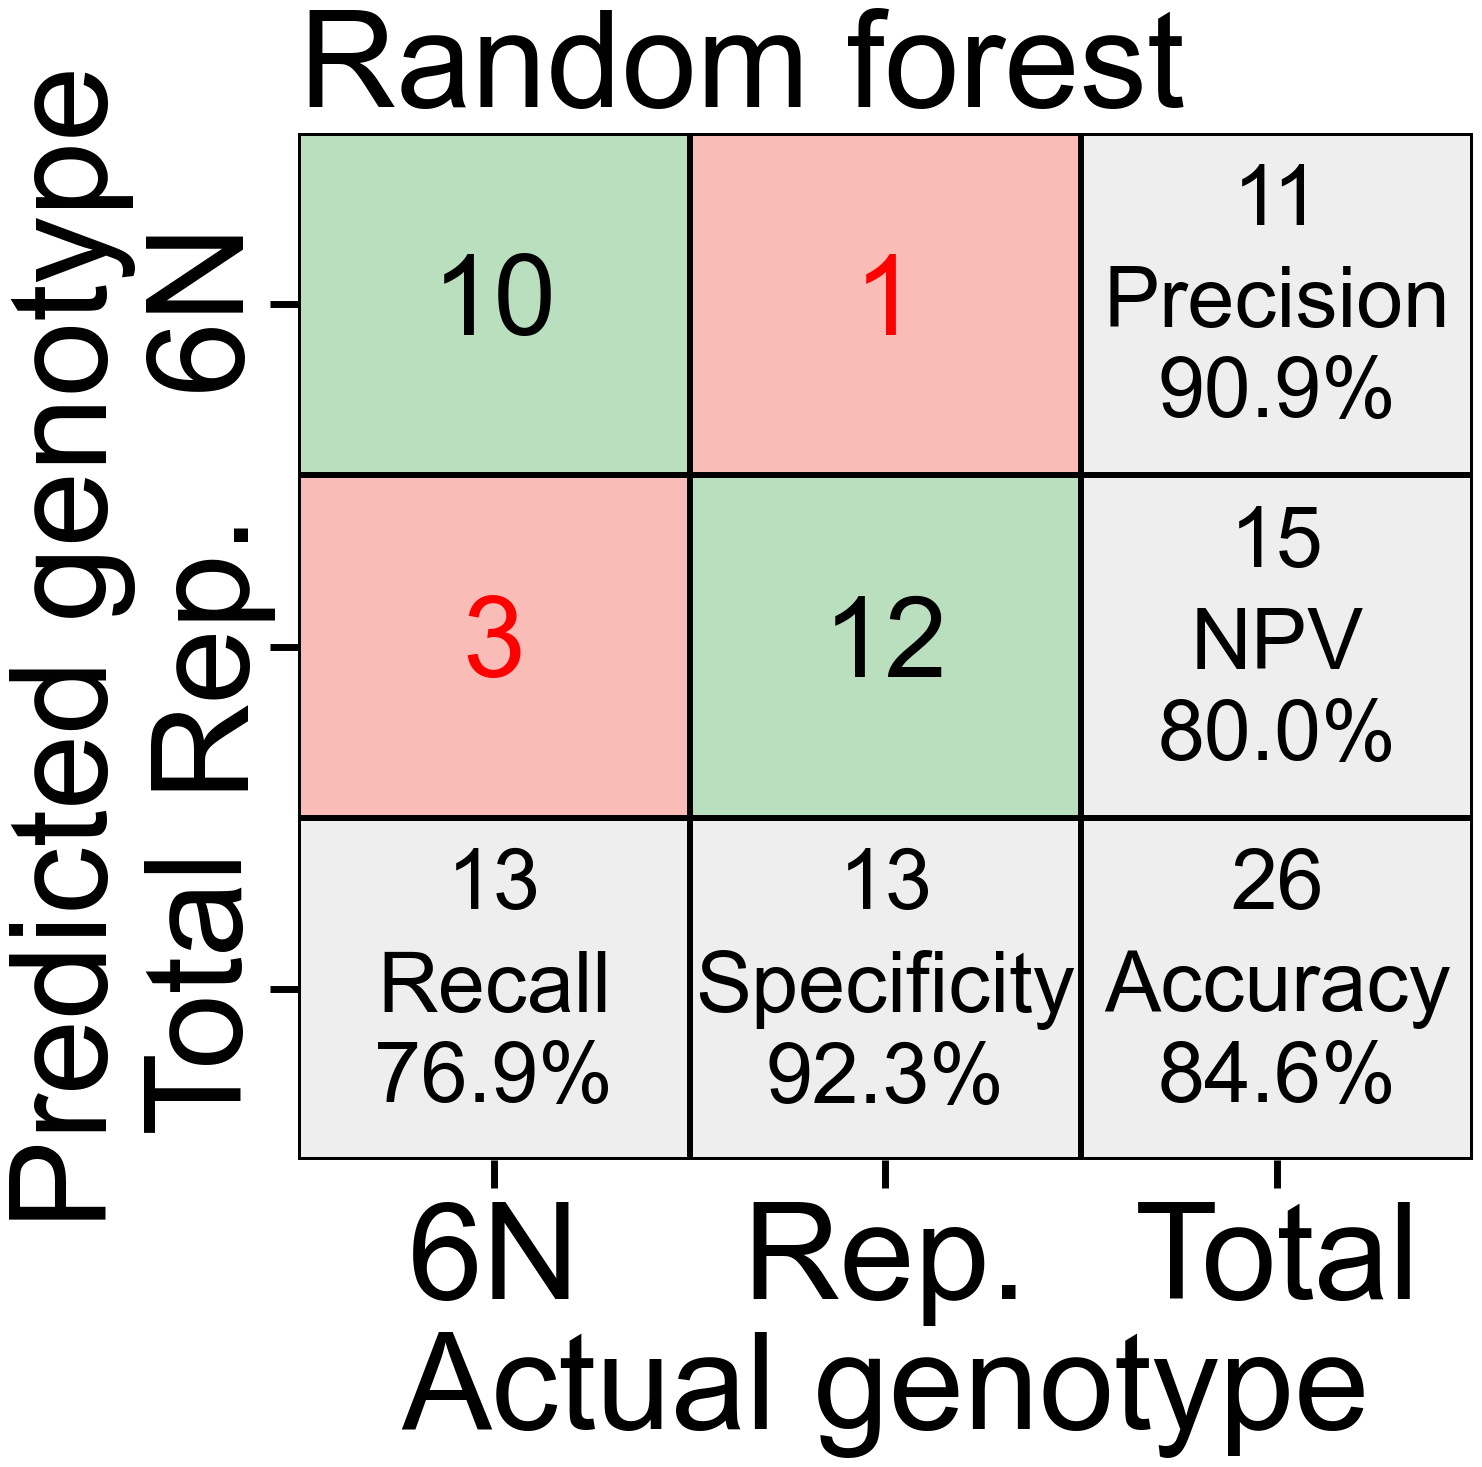

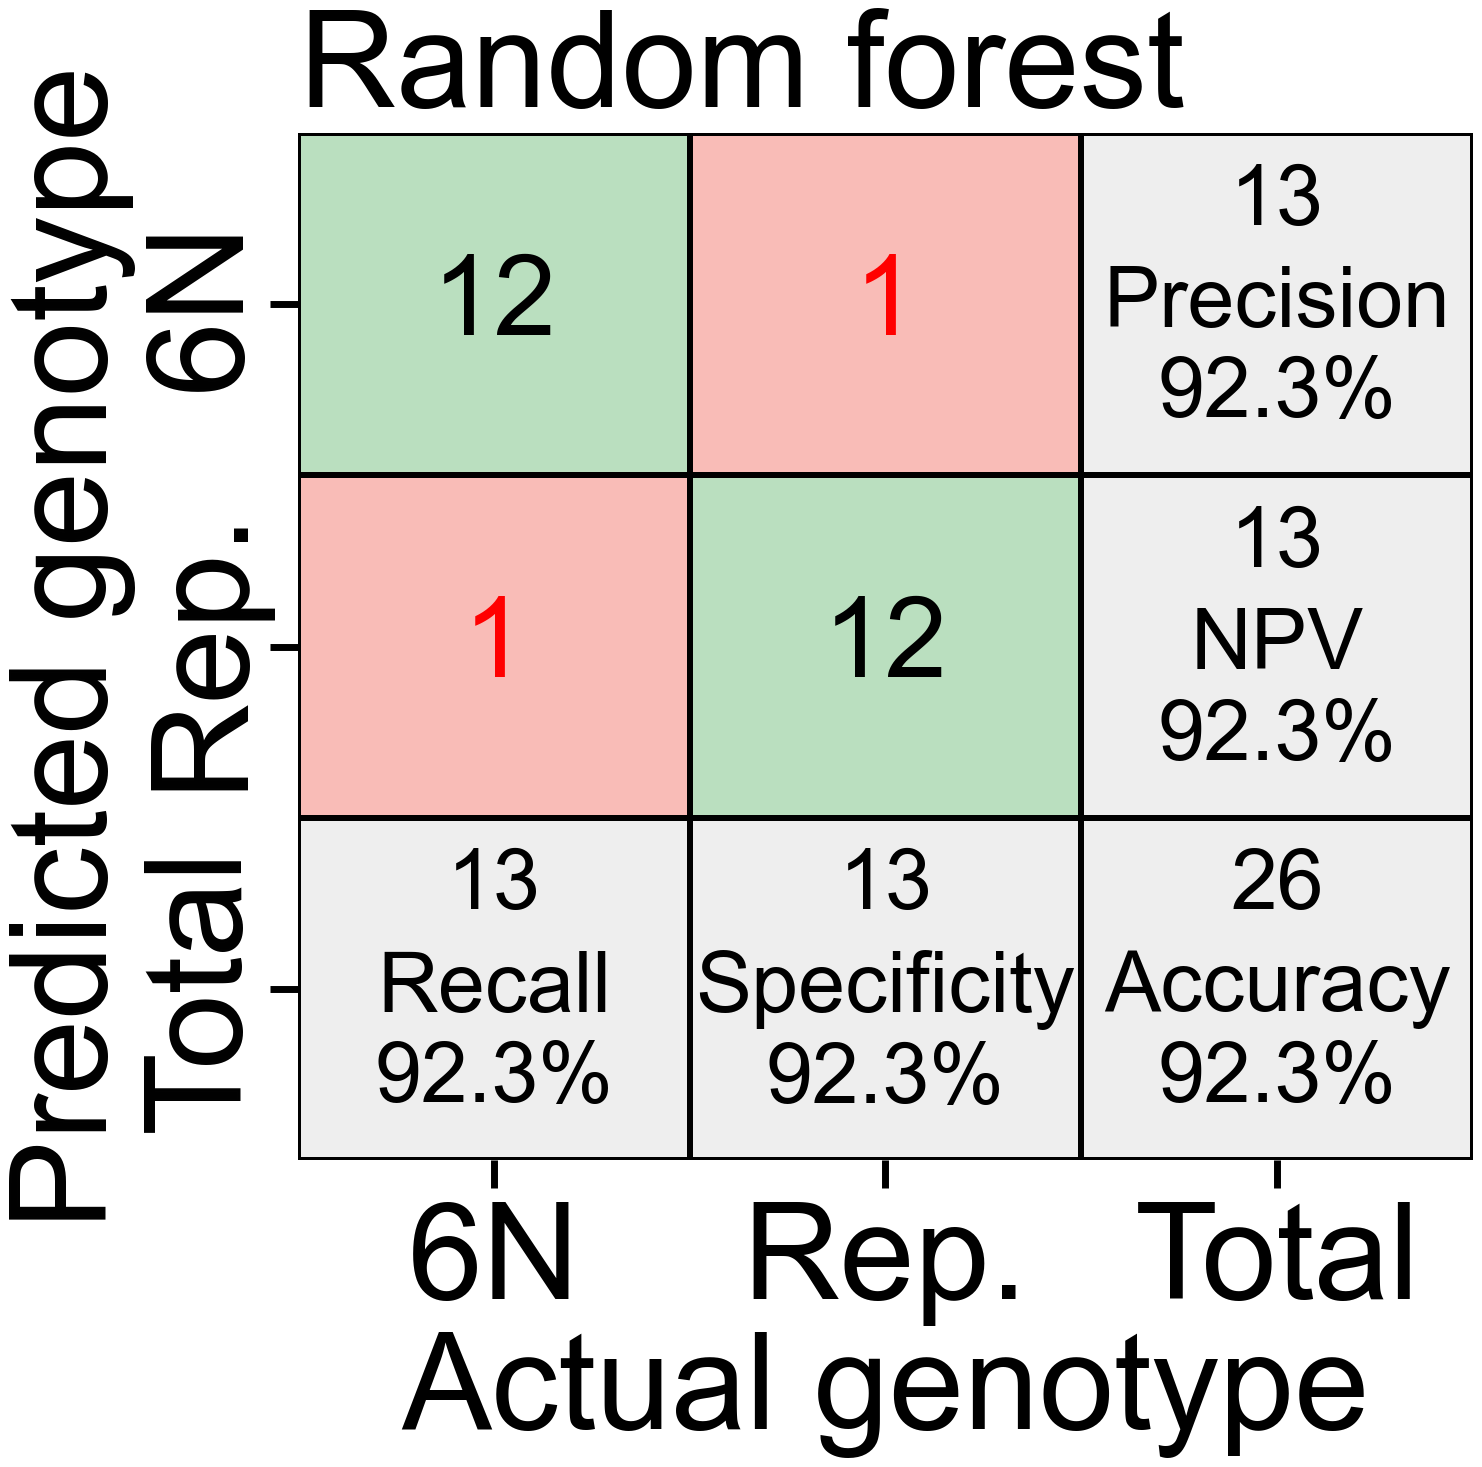

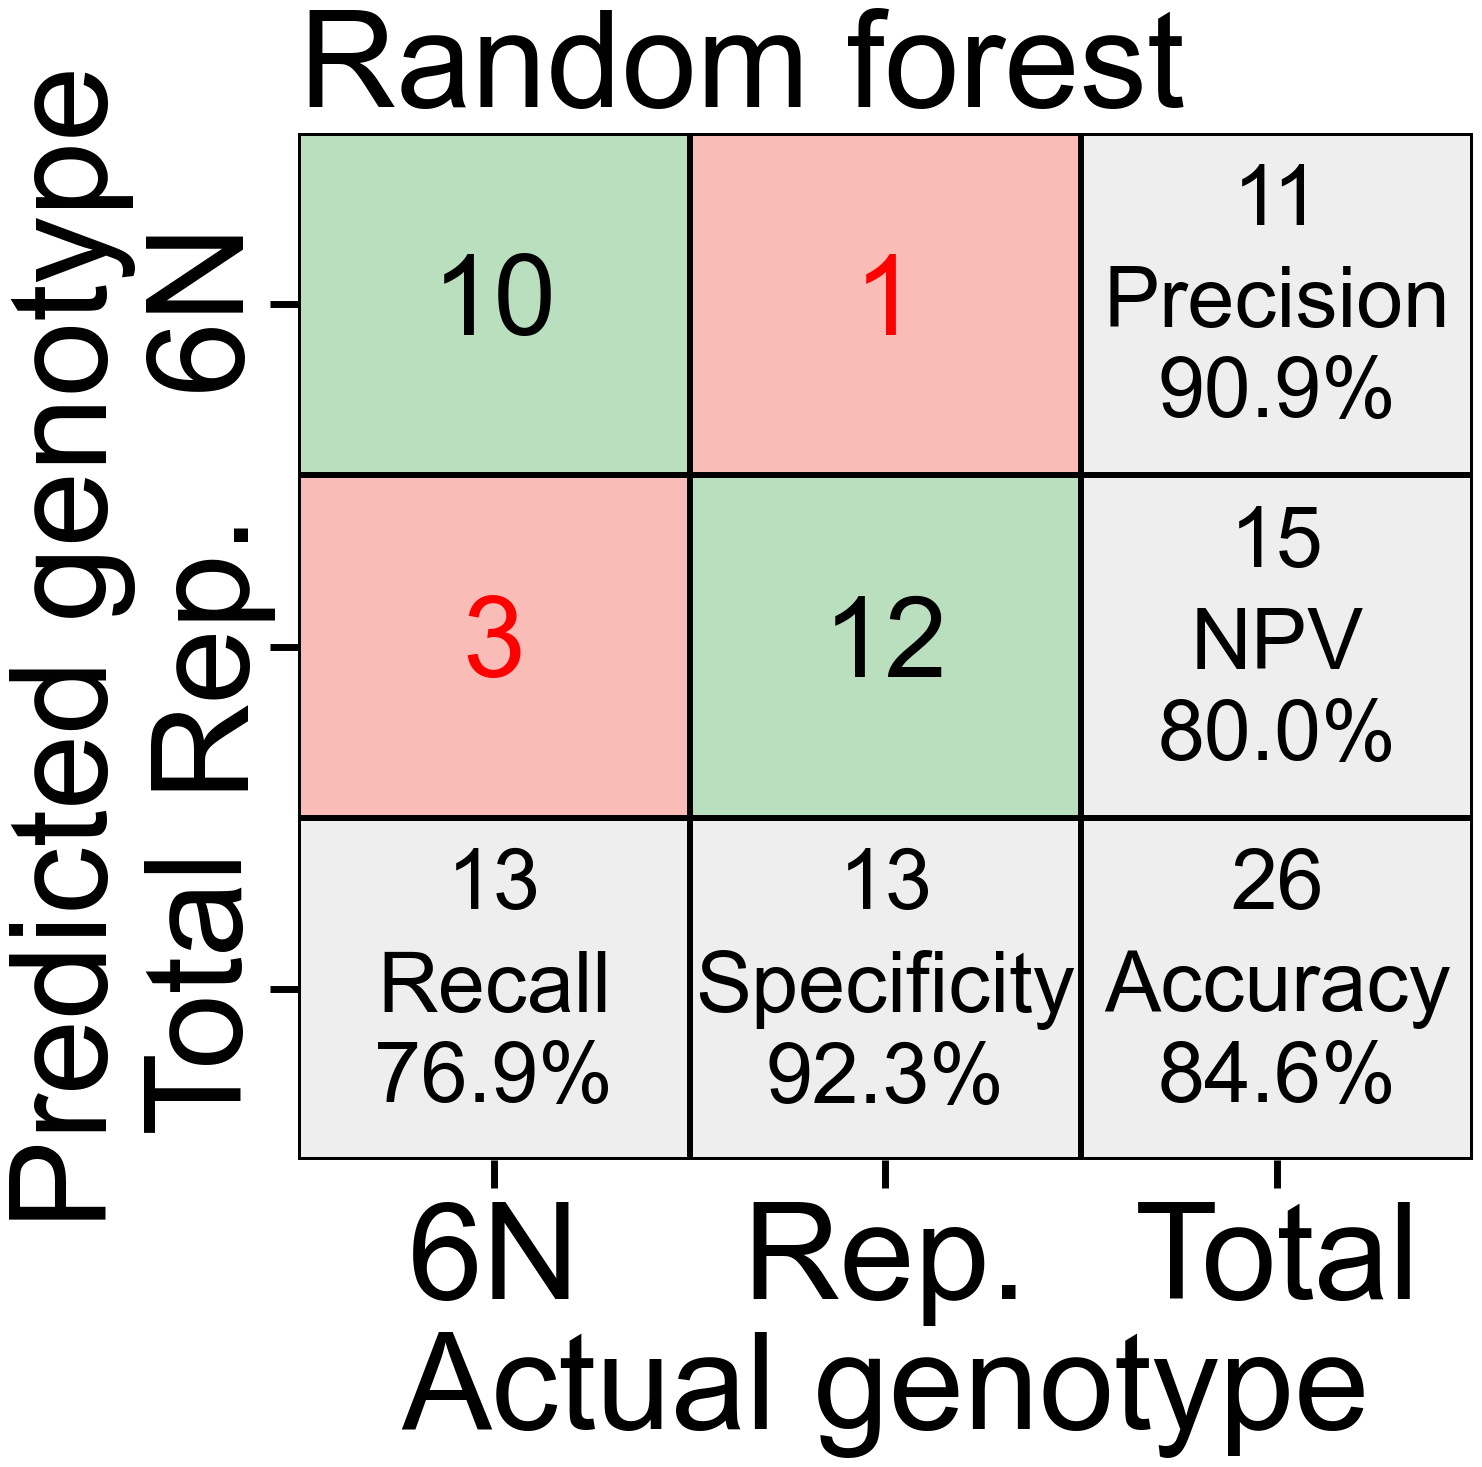

In [13]:
df = pd.read_csv(os.path.join(resultFolder,'forest_kFoldCrossValidation_AnovaFS10percentClicktestResults.csv'),index_col=0)
y_test = df['y_test']
y_predict = df['y_predict']
fig = figureTools.makeConfMatrix(y_test,y_predict,'Random forest',fontSize=fontSize,innerFontSize=54*1.5)
fig.savefig('./Panels/cm_rf_click.pdf',dpi=1200)

df = pd.read_csv(os.path.join(resultFolder,'SVC_kFoldCrossValidation_AnovaFS10percent_ClicktestResults.csv'),index_col=0)
y_test = df['y_test']
y_predict = df['y_predict']
fig = figureTools.makeConfMatrix(y_test,y_predict,'SVM',fontSize=fontSize,innerFontSize=54*1.5)
fig.savefig('./Panels/cm_svc_click.pdf',dpi=1200)

df = pd.read_csv(os.path.join(resultFolder,'XGBOOST_kFoldCrossValidation_AnovaFS10percent_ClicktestResults.csv'),index_col=0)
y_test = df['y_test']
y_predict = df['y_predict']
fig = figureTools.makeConfMatrix(y_test,y_predict,'XGBOOST',fontSize=fontSize,innerFontSize=54*1.5)
fig.savefig('./Panels/cm_xgb_click.pdf',dpi=1200)


df = pd.read_csv(os.path.join(resultFolder,'ROCKET_kFoldCrossValidation_AnovaFS10percent_ClicktestResults.csv'),index_col=0)
y_test = df['y_test']
y_predict = df['y_predict']
fig = figureTools.makeConfMatrix(y_test,y_predict,'ROCKET',fontSize=fontSize,innerFontSize=54*1.5)
fig.savefig('./Panels/cm_rocket_click.pdf',dpi=1200)



df = pd.read_csv(os.path.join(resultFolder,'MLP_kFoldCrossValidation_AnovaFS10percent_ClicktestResults.csv'),index_col=0)
y_test = df['y_test']
y_predict = df['y_predict']
fig = figureTools.makeConfMatrix(y_test,y_predict,'MLP',fontSize=fontSize,innerFontSize=54*1.5)
fig.savefig('./Panels/cm_mlp_click.pdf',dpi=1200)


# #Hc takes 10 minutes to run.
df = pd.read_csv(os.path.join(resultFolder,'hivecote_kFoldCrossValidation_AnovaFS10percent_ClicktestResults.csv'),index_col=0)
y_test = df['y_test']
y_predict = df['y_predict']
fig = figureTools.makeConfMatrix(y_test,y_predict,'HiveCote v2.0',fontSize=fontSize,innerFontSize=54*1.5)
fig.savefig('./Panels/cm_hc_click.pdf',dpi=1200)


# Shapley coefficients plots

In [14]:
import joblib
import figureTools

In [15]:
data,thresholds,dataversion = at.loadFiles(datafolder='../../data')
abr6N = []
abrRep = []
folderN = 1
for i,el in data.iterrows():
    strain = el['Strain']
    if not pd.isna(el[f'Folder {folderN}']):
        folder = os.path.join('../../data',el[f'Folder {folderN}'][2:])
        abr = at.extractABR(folder)
        if strain =='6N':
            abr6N.append(abr)
        elif strain =='Repaired':
            abrRep.append(abr)

abr = pd.concat(abr6N+abrRep).reset_index().groupby(['level_0','level_1']).mean()

The dataset version is: 20230914 - V41


In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def makeFigureFeatureImportanceSingle(h1,h2,out,fi,title,thresholds = None,fig=None,axs=None,linecolor = 'k',cmap=plt.cm.inferno,columns=np.arange(9),figsize=np.array([ 15.8/3 ,  16.35]),fontSize=28):
    
    """
    Generate a figure from ABR trace data. This is an adaptation of the function in the figureTools module to plot feature importance data for Click datasets.
    Parameters:
    h1 (list): List containing frequency values.
    h2 (list): List containing intensity values.
    out (ndarray): Output data to be plotted.
    fi (ndarray): Feature importance data.
    title (str): Title of the figure.
    thresholds (list, optional): Threshold values for plotting. Defaults to None.
    fig (matplotlib.figure.Figure, optional): Figure object to plot on. Defaults to None.
    axs (ndarray, optional): Axes array to plot on. Defaults to None.
    linecolor (str, optional): Color of the plot lines. Defaults to 'k'.
    cmap (matplotlib.colors.Colormap, optional): Colormap for the feature importance. Defaults to plt.cm.inferno.
    columns (ndarray, optional): Columns to be used for plotting. Defaults to np.arange(9).
    figsize (ndarray, optional): Size of the figure. Defaults to np.array([15.8/3, 16.35]).
    fontSize (int, optional): Font size for the text in the figure. Defaults to 28.
    Returns:
    fig (matplotlib.figure.Figure): The generated figure.
    axs (ndarray): Array of axes in the figure.
    """

    frequency = [h1[0]]#[100,3000,6000, 12000,18000,24000,30000,36000,42000 ]
    intensity = h2#arange(0,100,5)
    
    nint = len(intensity)
    
    nfreq=1
    freqmap=dict(zip(frequency,np.arange(len(frequency))))
    imap = dict(zip(intensity,np.arange(len(intensity))))

    ntraces = 153
    ppt = 1953 #points per trace
    

    if fig is None:
        fig,axs=plt.subplots(nint,nfreq,sharex=False, sharey=False,subplot_kw={'xticks': [], 'yticks': []},figsize=figsize)
    for i in range(len(intensity)):
        row = i#imap[int(h2[i])]

        #plotn = i+row*len(frequency)
        linecol = linecolor


        axs[nint-row-1].plot(out[i,2:],c=linecol,linewidth=2)

        if nint-row-1==0:
            tit1 = int(h1[i])

            if tit1 == 100:
                tit='Click'
            else:
                tit = str(int(tit1/1000))+' kHz'
            axs[nint-row-1].set_title(tit,fontsize=fontSize,ha='center')
        
        
        #axs[nint-row-1].set_ylabel(str(int(h2[i]))+' dB')
    
    

    for row in range(nint):
        tr = fi[(16-row)*ppt:(16-row+1)*ppt]
        currAx = row
        ax = fig.axes[currAx]
        divider = make_axes_locatable(ax)

        ax2 = divider.append_axes("bottom", size="100%", pad=-0.1, sharex=ax)
        #ax2.plot(tr,'r')
       # ax2.set_ylim(fi.min(),fi.max())
        ax2.imshow(tr.reshape((1,-1)),aspect=30,cmap=cmap,vmin=fi.min(),vmax=max(fi),alpha=1,interpolation='None')
        
            
    # ylims=(0,100)
    # for i in range(20,37):
    #     ax = fig.axes[i]
    #     ax.set_ylim(-0.1,0.1)
    #     ax.axis('off')
    
    plt.tight_layout()   
    for i in range(0,len(intensity)*2):
        ax = fig.axes[i]
    # ax.set_ylim(-4.5,7)
        ax.axis('off')
        ax.set_xlim(0,10*fs/1000)
    fig.patch.set_facecolor('white')
    fig.subplots_adjust(wspace=0.05,hspace=0)


    fig.text(0.08,0.93,'95',fontsize=fontSize, rotation = 0,va='center',ha='center')
    fig.text(0.08,0.97,'dB',fontsize=fontSize, rotation = 0,va='center',ha='center')
    for i in range(16):
        fig.text(0.08,0.0505+i*0.055,f'{15+5*i}',fontsize=fontSize, rotation = 0,va='center',ha='center')

    fig.suptitle(title,y=1.015,fontsize=fontSize,weight='bold')
    

    return fig,axs


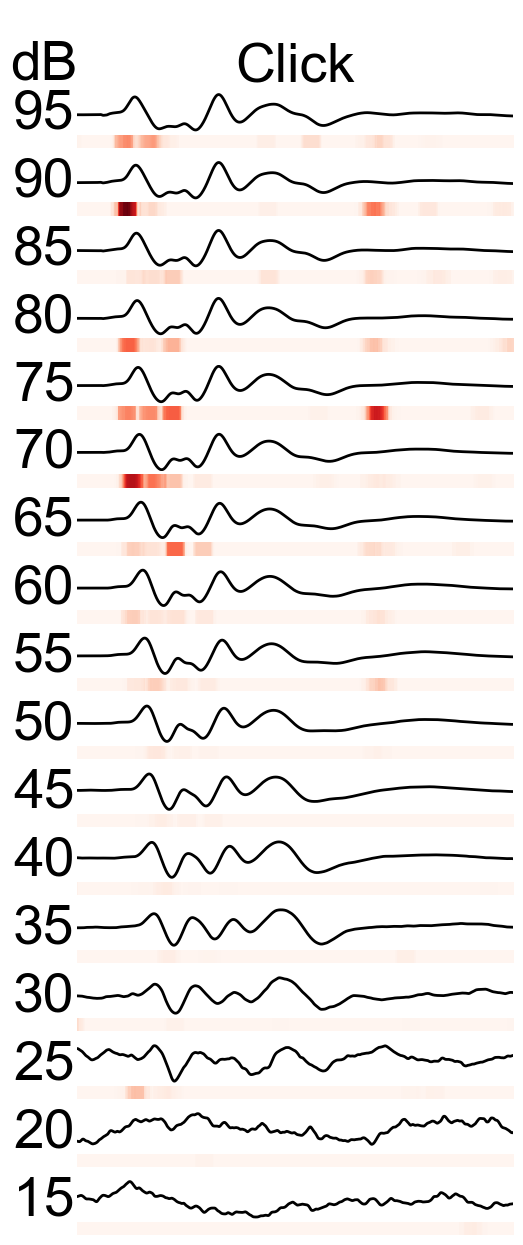

In [17]:
import joblib
savgolFilterOrder = 41
cmap = cm.Reds
abr100 = abr.reset_index().query('level_0==100 & level_1>=15').sort_values('level_1')

#Average 3 models

fi1 = pd.read_csv(os.path.join(resultFolder,'forest_kFoldCrossValidation_AnovaFS10percentClickShapCoeff.csv'),index_col=0)
fi1 = abs(fi1).mean(1).values
fi1 = savgol_filter(fi1,savgolFilterOrder,1)
fi2 = pd.read_csv(os.path.join(resultFolder,'SVC_kFoldCrossValidation_AnovaFS10percent_ClickShapCoeff.csv'),index_col=0)
fi2 = abs(fi2).mean(1).values
fi2 = savgol_filter(fi2,savgolFilterOrder,1)
fi3 = pd.read_csv(os.path.join(resultFolder,'xgboost_kFoldCrossValidation_AnovaFS10percent_ClickShapCoeff.csv'),index_col=0)
fi3 = abs(fi3).mean(1).values
fi3 = savgol_filter(fi3,savgolFilterOrder,1)

fi = (fi1/fi1.max()+fi2/fi2.max()+fi3/fi3.max())/3
fig,axs = makeFigureFeatureImportanceSingle(abr100.values[:,0],abr100.values[:,1],abr100.values,fi,title=' ',linecolor='k',cmap=cmap,columns=[0],figsize=np.array([ 15.8/3 ,  12.35]),fontSize=fontSize*0.41)

fig.savefig('./Panels/forest_shapley_Click.pdf',dpi=1200,transparent=True)


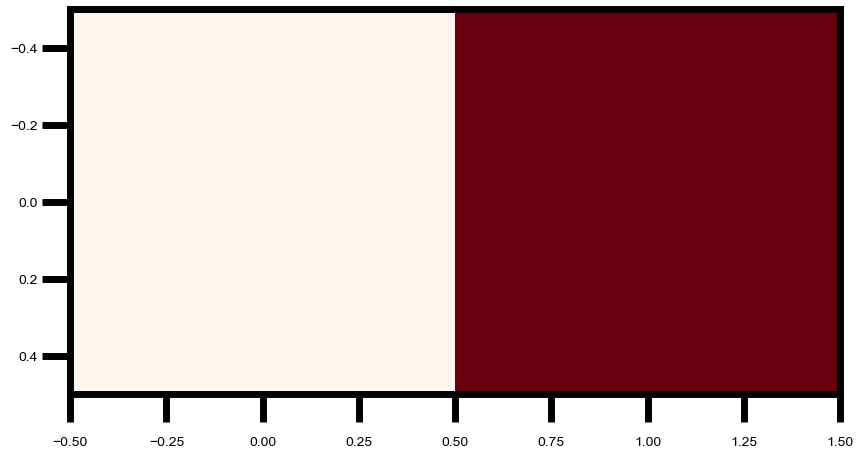

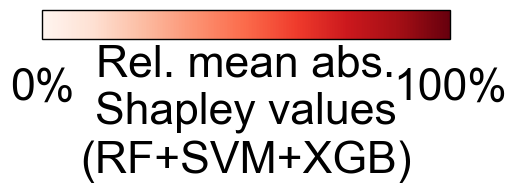

In [18]:
# Colorbar
a = np.array([[0,1]])


img = imshow(a, cmap=cmap)
f=figure(figsize=(15.8/3 ,3.7*2.5*1.2))
gs= gridspec.GridSpec(2,1,height_ratios=[30,1],hspace=0,figure=f)
#ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])



colorbar(orientation="horizontal", cax=ax2,mappable=img)
ax2.set_xticks([0,1],['0%','100%'])
ax2.set_xlabel('Rel. mean abs.\nShapley values\n(RF+SVM+XGB)',rotation=0, va='center')
# for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
#             ax1.get_xticklabels() + ax1.get_yticklabels()):
#     item.set_fontsize(28)
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
            ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(fontSize*0.33)
ax2.xaxis.set_tick_params(width=0,length=10,color='w')
[i.set_linewidth(1) for i in ax2.spines.values()]

#ax2.set_frame_on(False)
gs.tight_layout(f)
f.savefig('./Panels/shapleyColorbar_click.pdf',dpi=1200,transparent=True)